### About Dataset
Customer behavior and booking possibilities have been radically changed by online hotel reservation channels. Cancellations or no-shows cause a significant number of hotel reservations to be canceled. Cancellations can be caused by a variety of factors, such as scheduling conflicts, changes in plans, etc. In many cases, this is made easier by the possibility of doing so free or at a low cost, which is beneficial for hotel guests but less desirable and possibly revenue-diminishing for hotels.

As a Data Scientist, your job is to build a Machine Learning model to help the Hotel Owners better understand if the customer is going to honor the reservation or cancel it ?

### Dataset Description

The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below
* Booking_ID: unique identifier of each booking
* No of adults: Number of adults
* No of children: Number of Children
* noofweekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* noofweek_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* typeofmeal_plan: Type of meal plan booked by the customer:
* requiredcarparking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* roomtypereserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* Market segment type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* noofprevious_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* noofpreviousbookingsnot_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avgpriceper_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* noofspecial_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

### Importing necessary libraries

In [43]:
### importing libraries

#Data Wrangling libraries
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loadingthe dataset

In [44]:
train_g = pd.read_csv('train.csv',index_col='id')
test = pd.read_csv('test.csv', index_col='id')
sample_submission = pd.read_csv('sample_submission.csv')
original = pd.read_csv("C:\\Users\\2211444\\Desktop\\kaggle\\Week 5\\archive (1)\\train__dataset.csv")

In [45]:
train_g.shape

(42100, 18)

In [46]:
train_g.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
id,,,,,,,,,,,,,,,,,,
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [47]:
original.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [48]:
original.shape

(18137, 18)

In [49]:
features = test.columns.to_list()

train_g['generated'] = 1
test['generated'] = 1
original['generated'] = 0

train= pd.concat([train_g, original], ignore_index=True, axis=0).reset_index(drop=True)
target = 'booking_status'

In [50]:
train.shape

(60237, 19)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60237 entries, 0 to 60236
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          60237 non-null  int64  
 1   no_of_children                        60237 non-null  int64  
 2   no_of_weekend_nights                  60237 non-null  int64  
 3   no_of_week_nights                     60237 non-null  int64  
 4   type_of_meal_plan                     60237 non-null  int64  
 5   required_car_parking_space            60237 non-null  int64  
 6   room_type_reserved                    60237 non-null  int64  
 7   lead_time                             60237 non-null  int64  
 8   arrival_year                          60237 non-null  int64  
 9   arrival_month                         60237 non-null  int64  
 10  arrival_date                          60237 non-null  int64  
 11  market_segment_

Observation: No missing values

### Statistical analysis

In [52]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,60237.0,1.898451,0.523373,0.0,2.0,2.00,2.0,4.0
no_of_children,60237.0,0.130983,0.438391,0.0,0.0,0.00,0.0,9.0
no_of_weekend_nights,60237.0,0.862493,0.882668,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,60237.0,2.341086,1.429660,0.0,1.0,2.00,3.0,17.0
type_of_meal_plan,60237.0,0.263061,0.601555,0.0,0.0,0.00,0.0,3.0
required_car_parking_space,60237.0,0.027176,0.162597,0.0,0.0,0.00,0.0,1.0
room_type_reserved,60237.0,0.401182,0.816168,0.0,0.0,0.00,1.0,6.0
lead_time,60237.0,98.314591,83.210861,0.0,30.0,81.00,150.0,443.0
arrival_year,60237.0,2017.845577,0.361357,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,60237.0,7.545130,2.907078,1.0,5.0,8.00,10.0,12.0


In [53]:
features

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

### Chcecking unique values for each feature

In [54]:
uniques = []
for f in features:
    item = {'feature':f}
    count = len(train[f].unique())
    item['count'] = count
    if count < 10:
        item['values'] = train[f].unique().tolist()
    elif count < train.shape[0]:
        item['values'] = train[f].unique().tolist()[:10] + ['...']
    else:
        item['values'] = ['All values are unique']
    uniques.append(item)
df_uniques = pd.DataFrame(uniques)
df_uniques = df_uniques.set_index('feature')

In [55]:
df_uniques

,count,values
feature,,
no_of_adults,5,"[2, 1, 0, 3, 4]"
no_of_children,6,"[0, 2, 1, 3, 4, 9]"
no_of_weekend_nights,8,"[0, 1, 2, 3, 5, 6, 4, 7]"
no_of_week_nights,18,"[2, 1, 0, 5, 3, 4, 7, 6, 8, 10, ...]"
type_of_meal_plan,4,"[1, 0, 2, 3]"
required_car_parking_space,2,"[0, 1]"
room_type_reserved,7,"[0, 2, 3, 1, 4, 5, 6]"
lead_time,341,"[9, 117, 315, 32, 258, 215, 320, 265, 189, 137..."
arrival_year,2,"[2018, 2017]"


In [56]:
categorical = [
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'type_of_meal_plan',
    'required_car_parking_space',
    'room_type_reserved',
    'arrival_year',
    'arrival_month',
    'market_segment_type',
    'repeated_guest',
    'no_of_special_requests'
]

continous = ['avg_price_per_room']

other = [
    'no_of_week_nights',
    'lead_time',
    'arrival_date',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
]


### date

In [58]:
from datetime import timedelta

for dfr in [train, train_g, original, test]:
    df= dfr.copy()
    df['arrival_year_month'] = pd.to_datetime(df['arrival_year'].astype(str) + df['arrival_month'].astype(str), format='%Y%m')

    df.loc[df.arrival_date > df.arrival_year_month.dt.days_in_month, 'arrival_date'] = (
        df.loc[df.arrival_date > df.arrival_year_month.dt.days_in_month, 'arrival_year_month'].dt.days_in_month   
    )
    df = df.drop('arrival_year_month', axis=1)

    dfr['nights'] = dfr['no_of_weekend_nights'] + dfr['no_of_week_nights']
    dfr['lead_x_nights'] = dfr['lead_time'] * dfr['nights']
    dfr['arrival'] = pd.to_datetime(df['arrival_year'].astype(str) + "/" + df['arrival_month'].astype(str) + "/" + df['arrival_date'].astype(str))
    dfr['booking'] = dfr['arrival'] - pd.to_timedelta(dfr['lead_time'], unit='D')
    dfr['departure'] = dfr['arrival'] + pd.to_timedelta(dfr['nights'], unit='D')

# base_features = features.copy()
# features += ['nights', 'lead_x_nights']

In [60]:
dfr.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,generated,nights,lead_x_nights,arrival,booking,departure
id,,,,,,,,,,,,,,,,,,,,,
42100,3,0,1,4,0,0,1,111,2018,12,...,0,0,115.6,2,1,5,555,2018-12-05,2018-08-16,2018-12-10
42101,2,0,0,3,0,0,0,22,2017,10,...,0,0,85.0,0,1,3,66,2017-10-21,2017-09-29,2017-10-24
42102,2,2,0,1,0,0,3,18,2018,8,...,0,0,240.0,1,1,1,18,2018-08-10,2018-07-23,2018-08-11


In [36]:
all = train.copy()
all['dataset'] = 'train'
tmp = test.copy()
tmp['dataset'] = 'test'
all = pd.concat([all, tmp], ignore_index=True, axis=0).reset_index(drop=True)

In [37]:
all

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,avg_price_per_room,no_of_special_requests,booking_status,generated,dataset,nights,lead_x_nights,arrival,booking,departure
0,2,0,0,2,1,0,0,9,2018,1,...,67.50,0,0.0,1,train,NaN,NaN,NaT,NaT,NaT
1,2,0,1,2,0,0,0,117,2018,7,...,72.25,0,0.0,1,train,NaN,NaN,NaT,NaT,NaT
2,2,0,0,1,0,0,0,315,2018,12,...,52.00,0,0.0,1,train,NaN,NaN,NaT,NaT,NaT
3,1,0,0,2,1,0,0,32,2018,12,...,56.00,0,0.0,1,train,NaN,NaN,NaT,NaT,NaT
4,2,0,1,0,0,0,0,258,2018,10,...,100.00,0,1.0,1,train,NaN,NaN,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88300,2,0,1,2,0,0,0,315,2018,9,...,160.00,0,NaN,1,test,3.0,945.0,2018-09-30,2017-11-19,2018-10-03
88301,2,0,2,2,0,0,0,81,2018,3,...,65.00,1,NaN,1,test,4.0,324.0,2018-03-25,2018-01-03,2018-03-29
88302,2,0,1,2,0,0,0,40,2018,10,...,85.00,0,NaN,1,test,3.0,120.0,2018-10-22,2018-09-12,2018-10-25
88303,3,0,0,4,0,0,1,4,2018,9,...,162.75,0,NaN,1,test,4.0,16.0,2018-09-06,2018-09-02,2018-09-10


In [39]:
train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'generated'],
      dtype='object')

In [41]:
dfr.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'generated', 'nights',
       'lead_x_nights', 'arrival', 'booking', 'departure'],
      dtype='object')

### Exploratory Data Analysis

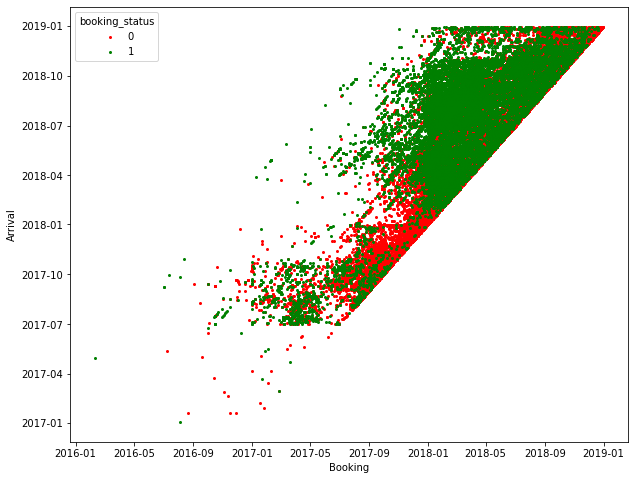

In [85]:
import matplotlib.pyplot as plt

df = train.copy()
df = df.sort_values('arrival')
df[target] = df[target].astype(str)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['red', 'green']
for idx, color in enumerate(colors):
    subset = df[df[target] == str(idx)]
    ax.scatter(subset['booking'], subset['arrival'], c=color, label=str(idx), marker='o', s=4)

ax.set_xlabel('Booking')
ax.set_ylabel('Arrival')
ax.legend(title=target, loc='best')
plt.show()


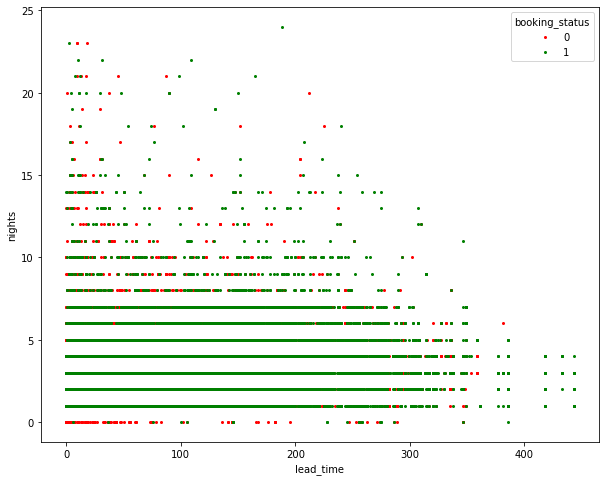

In [86]:
import matplotlib.pyplot as plt

df = train.copy()
df = df.sort_values('arrival')
df[target] = df[target].astype(str)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['red', 'green']
for idx, color in enumerate(colors):
    subset = df[df[target] == str(idx)]
    ax.scatter(subset['lead_time'], subset['nights'], c=color, label=str(idx), marker='o', s=4)

ax.set_xlabel('lead_time')
ax.set_ylabel('nights')
ax.legend(title=target, loc='best')
plt.show()


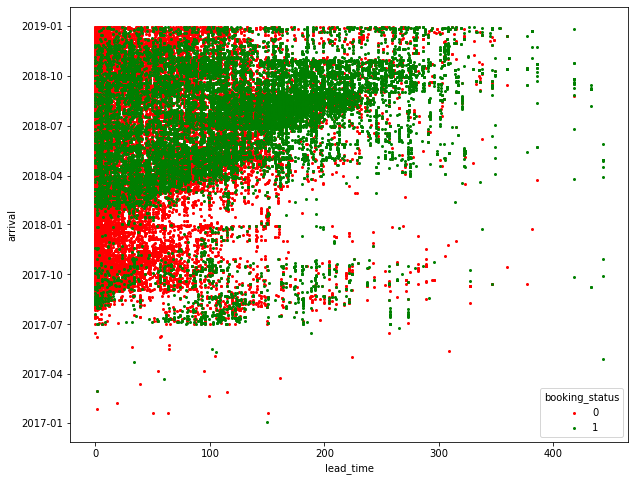

In [87]:
import matplotlib.pyplot as plt

df = train.copy()
df = df.sort_values('arrival')
df[target] = df[target].astype(str)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['red', 'green']
for idx, color in enumerate(colors):
    subset = df[df[target] == str(idx)]
    ax.scatter(subset['lead_time'], subset['arrival'], c=color, label=str(idx), marker='o', s=4)

ax.set_xlabel('lead_time')
ax.set_ylabel('arrival')
ax.legend(title=target, loc='best')
plt.show()


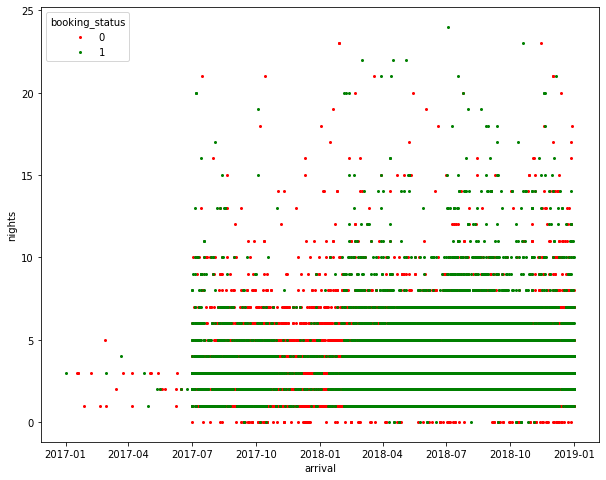

In [88]:
import matplotlib.pyplot as plt

df = train.copy()
df = df.sort_values('arrival')
df[target] = df[target].astype(str)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['red', 'green']
for idx, color in enumerate(colors):
    subset = df[df[target] == str(idx)]
    ax.scatter(subset['arrival'], subset['nights'], c=color, label=str(idx), marker='o', s=4)

ax.set_xlabel('arrival')
ax.set_ylabel('nights')
ax.legend(title=target, loc='best')
plt.show()


In [89]:
for df in [train, train_g, original, test]:
    df.drop(['booking', 'arrival', 'departure'], axis=1, inplace=True)
features = test.columns.to_list()

### Target

In [90]:
tr = pd.DataFrame(train[target].value_counts() / len(train))
tr[target] = np.rint(tr[target] * 100).astype(str) + '%'

display(tr)

,booking_status
0,63.0%
1,37.0%


In [93]:
sample=train.sample(800)
import math

C:\Users\2211444\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\2211444\Anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


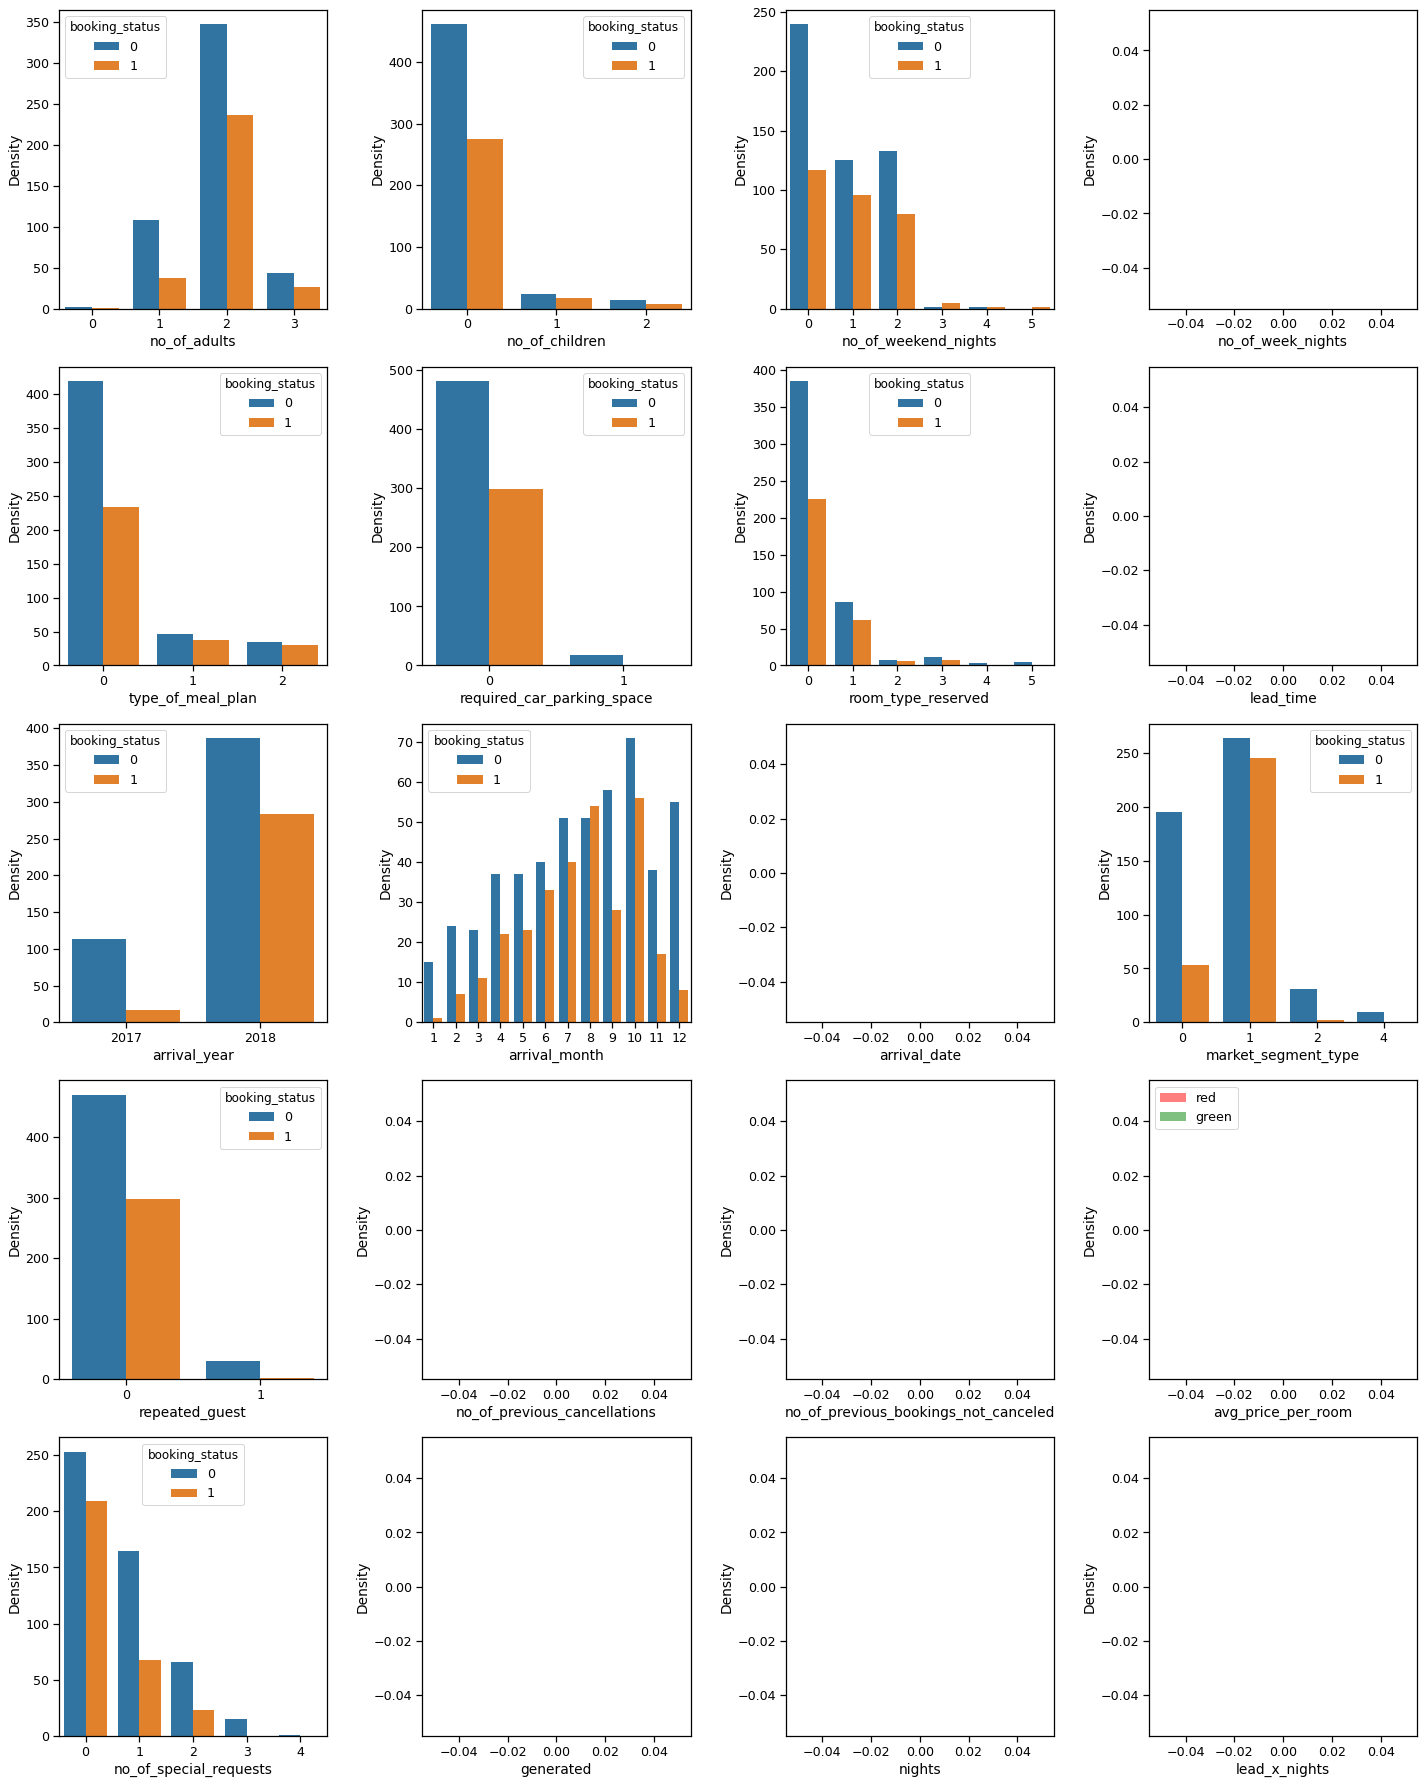

In [107]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 5*nrows))
r, c = 0, 0
for f in features:
    if f == 'avg_price_per_room':
        axs[r, c].hist(sample[sample[target] == 'red'][f], color='red', alpha=0.5, density=True, label='red')
        axs[r, c].hist(sample[sample[target] == 'green'][f], color='green', alpha=0.5, density=True, label='green')
        axs[r, c].legend()
    elif f in categorical:
        sns.countplot(data=sample, x=f, hue=target, ax=axs[r, c])
    else:
        axs[r, c].hist(sample[sample[target] == 'red'][f], color='red', alpha=0.5, density=True, label='red')
        axs[r, c].hist(sample[sample[target] == 'green'][f], color='green', alpha=0.5, density=True, label='green')
    axs[r, c].set_xlabel(f)
    axs[r, c].set_ylabel('Density')
    c += 1
    if c > ncols-1:
        c = 0
        r += 1
plt.tight_layout()
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


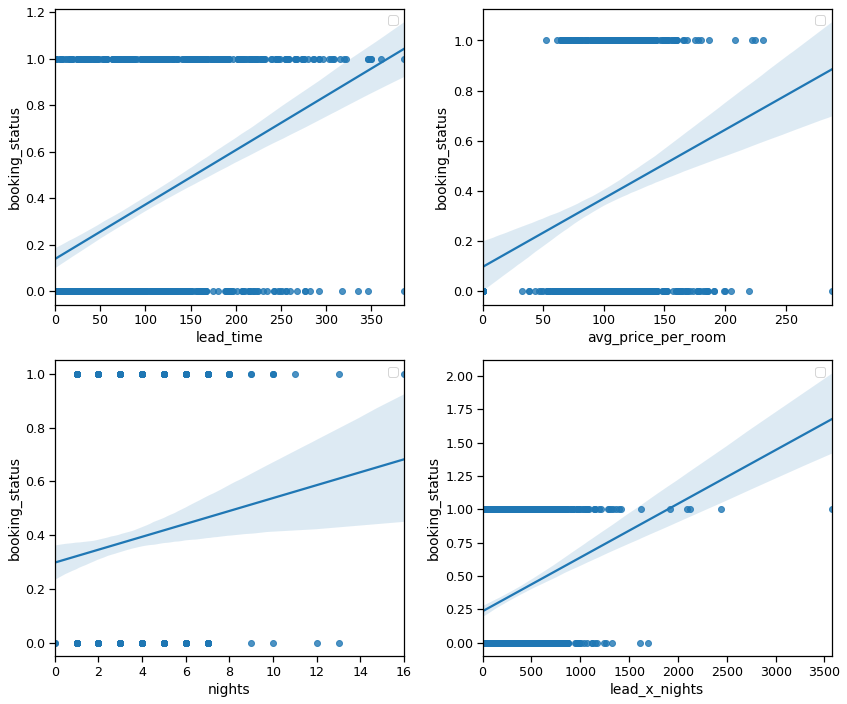

In [108]:
sns.set_context("notebook", font_scale=1.15) #, rc={"font.size":30,"axes.titlesize":20,"axes.labelsize":20}) 

group = ['lead_time', 'avg_price_per_room', 'nights', 'lead_x_nights']

qty = len(group)
ncols = 2
nrows = math.ceil(qty / ncols) 
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 5*nrows))
r, c = 0, 0
for f in group:
    sns.regplot(data=sample, x=f, y=target, ax=axs[r,c])
    axs[r,c].legend()
    c += 1
    if c > ncols-1:
        c = 0
        r += 1
plt.tight_layout()
plt.show()

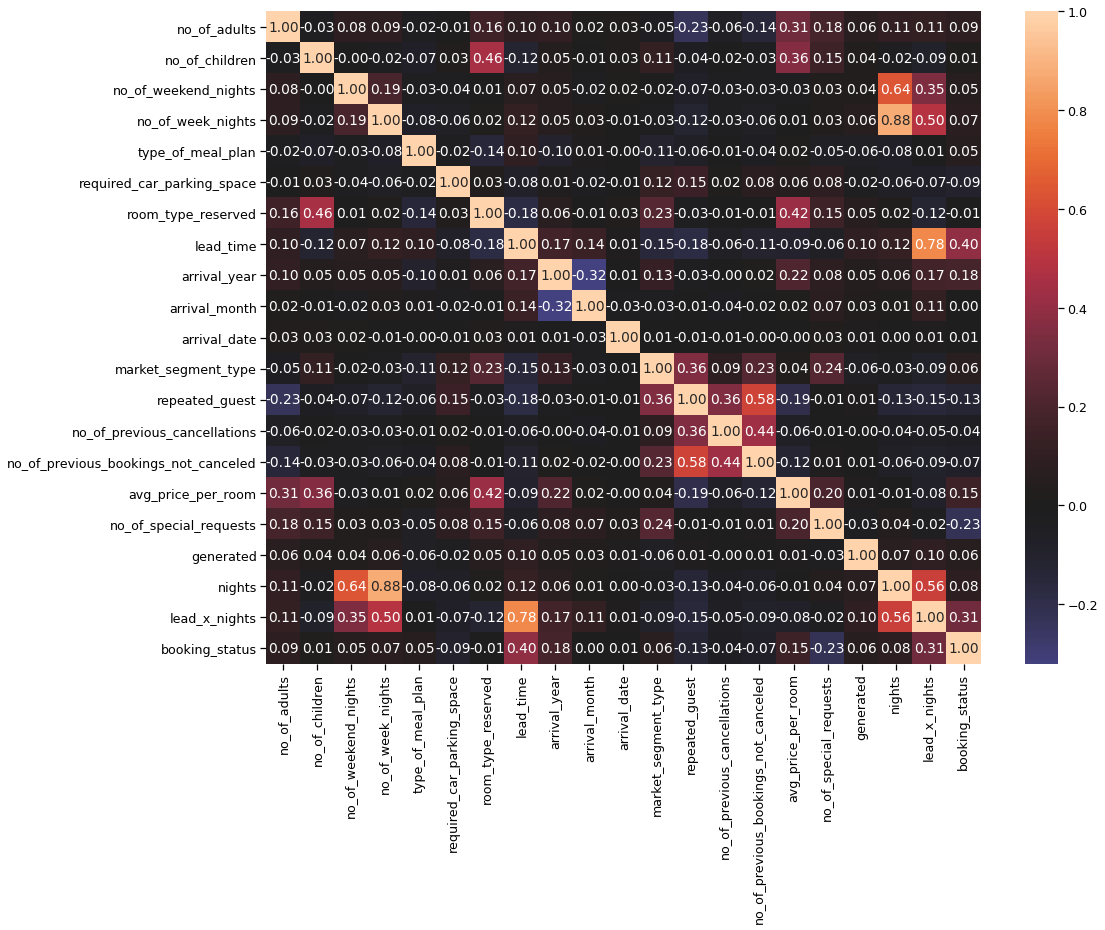

In [109]:
plt.figure(figsize=(16, 12))
sns.heatmap(train[features + [target]].corr(), center=0, annot=True, fmt='.2f')
plt.show()


In [110]:
plot = [
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'type_of_meal_plan',
    'required_car_parking_space',
    'room_type_reserved',
    'lead_time',
    'nights',
    'lead_x_nights'
    'market_segment_type',
    'repeated_guest',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'avg_price_per_room',
    'no_of_special_requests',
    target,
]

In [111]:
average_status = train.groupby(target).mean()
average_status.style.background_gradient(subset=features, cmap='Greens')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,generated,nights,lead_x_nights
booking_status,,,,,,,,,,,,,,,,,,,,
0,1.863116,0.125982,0.827552,2.260591,0.239210,0.038925,0.405864,72.913763,2017.794951,7.537853,15.787198,0.721442,0.044085,0.031330,0.266862,99.873932,0.723426,0.677304,3.088143,247.924691
1,1.957944,0.139401,0.921322,2.476611,0.303217,0.007396,0.393299,141.080460,2017.930812,7.557382,15.902165,0.803172,0.000802,0.002361,0.002718,111.588032,0.353337,0.735276,3.397933,478.486323


In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = train.copy()
train_scaled[features] = scaler.fit_transform(train_scaled[features])
average_status_scaled = train_scaled.groupby([target]).mean()
average_status_scaled.style.background_gradient(subset=features, cmap='Oranges')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,generated,nights,lead_x_nights
booking_status,,,,,,,,,,,,,,,,,,,,
0,-0.067516,-0.011406,-0.039587,-0.056304,-0.039648,0.072257,0.005736,-0.305261,-0.140099,-0.002503,-0.004838,-0.047714,0.097838,0.031771,0.057002,-0.119104,0.176980,-0.047090,-0.063517,-0.241399
1,0.113672,0.019204,0.066650,0.094796,0.066754,-0.121654,-0.009658,0.513950,0.235877,0.004215,0.008146,0.080333,-0.164724,-0.053492,-0.095971,0.200529,-0.297970,0.079283,0.106939,0.406430


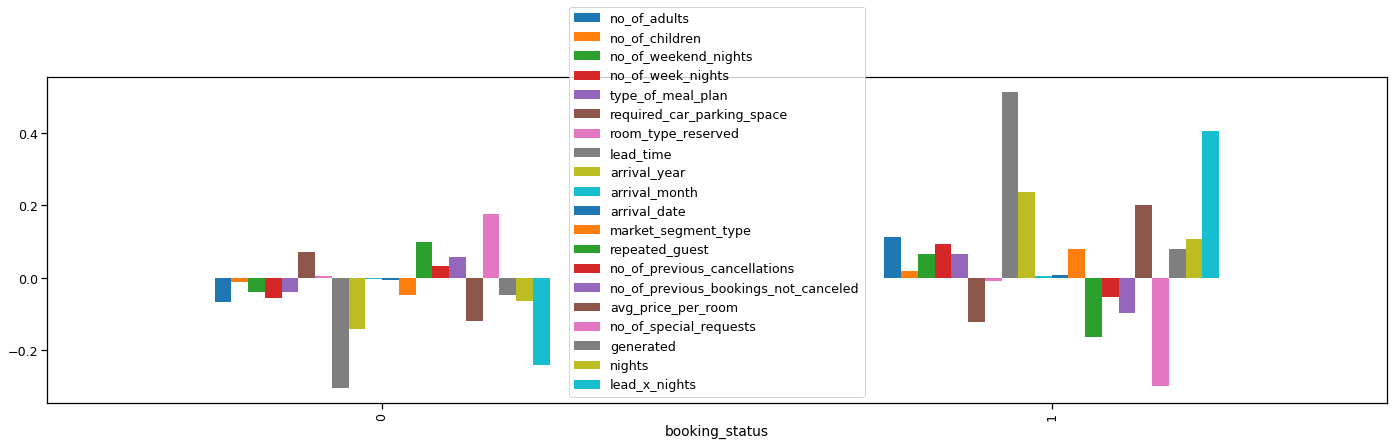

In [114]:
average_status_scaled.plot(kind="bar",figsize=(24,6))

In [115]:
df = average_status_scaled.T
df['diff'] = abs(df[0] - df[1])
df.sort_values('diff', ascending=False).style.background_gradient(subset='diff', cmap='Blues')

booking_status,0,1,diff
lead_time,-0.305261,0.513950,0.819211
lead_x_nights,-0.241399,0.406430,0.647829
no_of_special_requests,0.176980,-0.297970,0.474950
arrival_year,-0.140099,0.235877,0.375976
avg_price_per_room,-0.119104,0.200529,0.319633
repeated_guest,0.097838,-0.164724,0.262562
required_car_parking_space,0.072257,-0.121654,0.193911
no_of_adults,-0.067516,0.113672,0.181188
nights,-0.063517,0.106939,0.170456
no_of_previous_bookings_not_canceled,0.057002,-0.095971,0.152974



Loadings:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
no_of_adults,0.000165,0.000097,0.004649,-0.001752,0.000716,-0.032997,0.016478,0.036359,0.082864,-0.073895,-0.093762,0.289446,-0.875905,0.138164,0.323533,-0.014619,-0.005519,0.010409,-0.032709,-0.000000
no_of_children,-0.000115,0.000743,0.004209,-0.001337,0.000573,0.005667,-0.003815,0.017857,0.164838,0.156448,0.077718,0.055149,0.333881,-0.085779,0.901397,-0.081473,0.026843,0.007938,-0.010589,-0.000000
no_of_weekend_nights,0.000827,0.005740,-0.000844,-0.002062,0.011391,-0.042637,0.135280,0.799876,-0.066153,0.024000,-0.011450,-0.032717,0.016403,0.002422,-0.009422,0.006821,0.001538,0.002150,-0.002774,0.577350
no_of_week_nights,0.001917,0.012733,0.000203,0.003335,-0.002554,-0.154081,0.605166,-0.523934,0.036435,-0.014418,0.016179,-0.009091,-0.000561,0.003047,0.009120,-0.002117,0.000368,0.003986,-0.003947,0.577350
type_of_meal_plan,0.000016,-0.001711,0.000616,0.000207,0.000151,-0.010839,-0.011706,0.008060,-0.208079,-0.169632,0.945708,0.051869,-0.103829,-0.108243,0.002214,-0.083220,0.033123,0.002919,-0.004150,-0.000000
required_car_parking_space,-0.000034,0.000128,0.000208,0.000111,0.000444,0.008575,-0.004492,-0.000116,0.013782,-0.011996,0.000221,-0.018251,-0.001461,-0.002650,-0.004690,0.007871,-0.008435,0.982990,0.181124,-0.000000
room_type_reserved,-0.000275,0.002445,0.008939,-0.002686,-0.000705,0.016069,0.018543,0.037334,0.578475,0.674754,0.240665,0.279489,-0.011855,0.091606,-0.250704,-0.021132,0.008034,0.005412,-0.005074,-0.000000
lead_time,0.183618,-0.980220,0.070200,0.000221,0.004549,-0.003126,0.021768,0.003052,0.002156,0.001024,-0.000616,-0.001623,0.000713,0.000630,0.000029,0.001062,-0.000326,0.000247,-0.000323,-0.000000
arrival_year,0.000168,-0.000388,0.002365,-0.000279,0.045237,0.016277,0.004730,0.005750,0.046606,-0.025020,-0.090457,-0.095147,-0.036486,-0.039953,-0.074471,-0.902657,0.392760,0.007797,-0.003050,0.000000
arrival_month,0.000936,-0.004113,0.002971,0.011691,-0.998536,-0.003909,0.005614,0.011549,-0.011839,0.013639,-0.004226,-0.013307,-0.006007,0.000135,-0.000529,-0.039732,0.021036,0.000764,0.001741,-0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000265CB6F9550>,
      dtype=object)

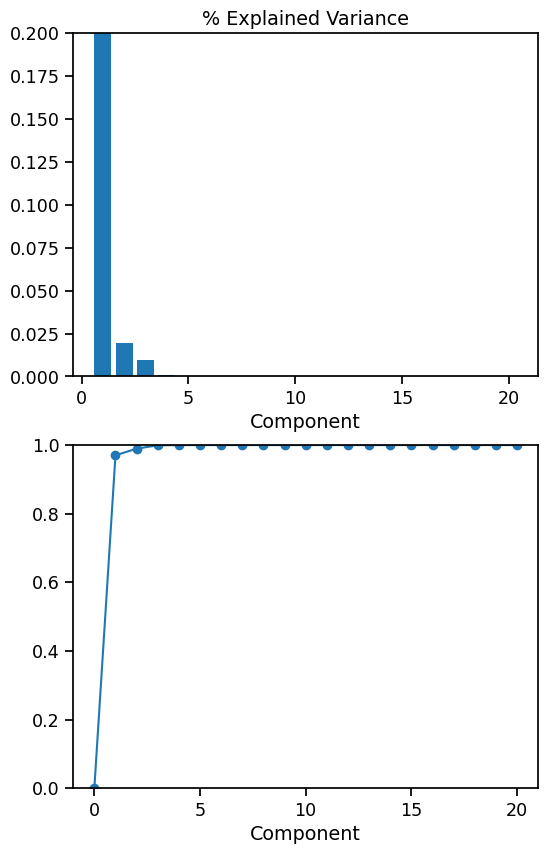

In [116]:
from sklearn.decomposition import PCA

def plot_variance(pca, width=6, height=10, dpi=100):
    # Create figure
    fig, axs = plt.subplots(2, 1)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 0.2)
    )

    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="", ylim=(0.0, 1.0)
    )
    
    # Set up figure
    fig.set(figwidth=width, figheight=height,  dpi=100)
    return axs

pca = PCA()
X_pca = pca.fit_transform(train.copy()[features])
X_test_pca = pca.transform(test.copy()[features])
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

# print('X_pca:')
# display(X_pca.head(3))

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=features,  # and the rows are the original features
)
print('\nLoadings:')
display(loadings.head(20).style.background_gradient(subset=loadings.columns.to_list(), cmap='Greens'))
plot_variance(pca)

<ipython-input-117-de20aa57a33b>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


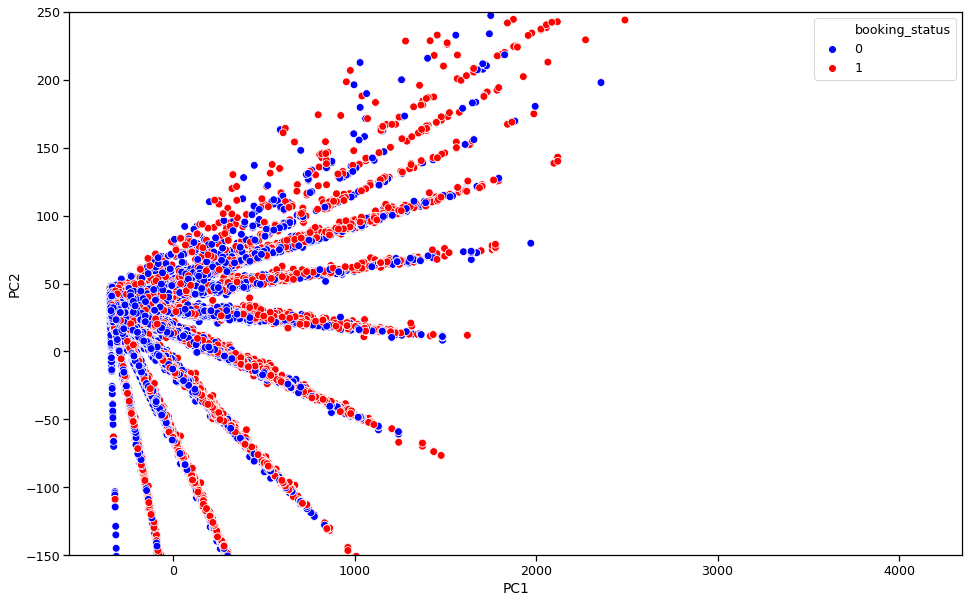

In [117]:
train_pca = X_pca.copy()
train_pca[target] = train[target]

fig = plt.figure(figsize=(16, 10))
ax = sns.scatterplot(x=train_pca["PC1"], y=train_pca["PC2"], hue=train_pca[target], s=60, palette=['b', 'r'])
ax.set_ylim(-150, 250)
ax.set_ylim(-150, 250)
fig.show()

In [119]:
!pip install eli5

     ------------------------------------ 216.2/216.2 kB 387.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 133.1/133.1 kB 561.0 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107735 sha256=8ca2dabac6b2a875bf3a78d2a7cd43275a5ba1a6631c7ada8da3cefe490412a7
  Stored in directory: c:\users\2211444\appdata\local\pip\cache\wheels\d0\b5\e0\9c5121f34043df6cbbec39ad10a5f059b75c883bce62a11379
Successfully built eli5
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.2
    Uninstalling Jinja2-2.11.2:
      Successfully uninstalled Jinja2-2.11.2


In [121]:
!pip install shap


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------------------------ 435.6/435.6 kB 755.4 kB/s eta 0:00:00


,feature,MI_score
0,lead_time,0.123767
1,lead_x_nights,0.102602
2,avg_price_per_room,0.102236
3,market_segment_type,0.036045
4,no_of_special_requests,0.034473
5,arrival_year,0.023127
6,arrival_month,0.022676
7,repeated_guest,0.011778
8,generated,0.008765
9,no_of_previous_bookings_not_canceled,0.008603


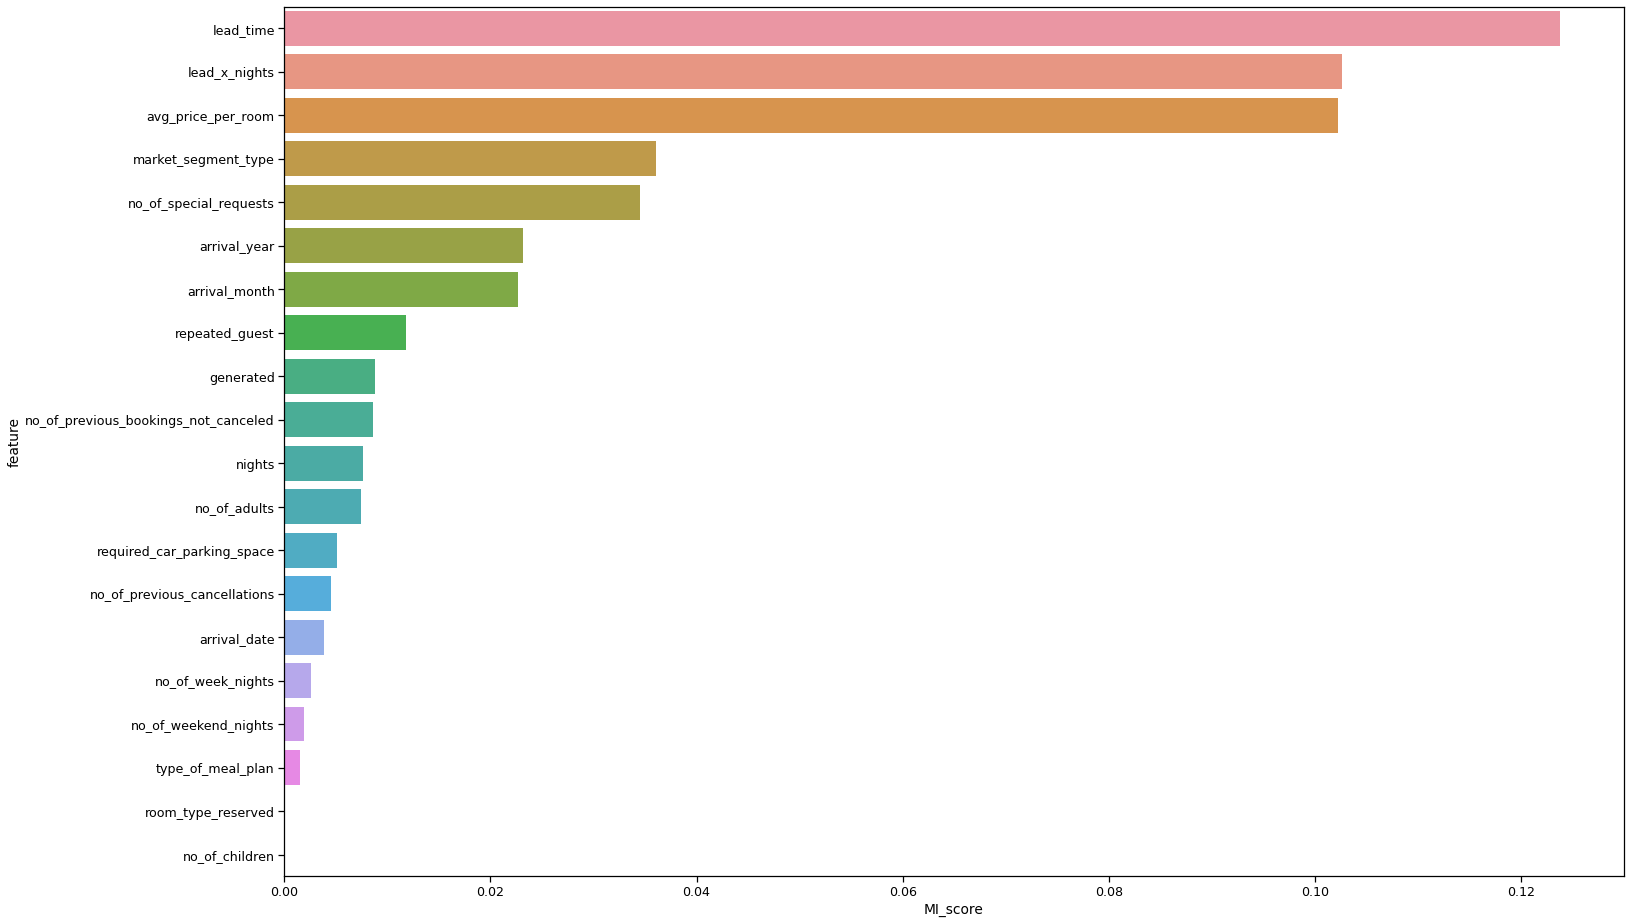

In [122]:
from sklearn.feature_selection import mutual_info_classif
import eli5
from eli5.sklearn import PermutationImportance
import shap

X_train = train.drop([target], axis=1)[features]
y_train = train[target]

mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
    
mi_scores = pd.Series(mi_scores, name="MI_score", index=X_train.columns)
mi_scores = mi_scores.sort_values(ascending=False)
df_mi_scores = pd.DataFrame(mi_scores).reset_index().rename(columns={'index':'feature'})
display(df_mi_scores.style.background_gradient(subset=['MI_score'], cmap='Reds'))
plt.figure(figsize=(24, 16))
sns.barplot(y=df_mi_scores['feature'], x=df_mi_scores['MI_score'])

In [124]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
model = LGBMClassifier(verbose=-1)
perm_train, perm_test, perm_y, perm_valid_y = train_test_split(X_train, y_train)
perm_model = model.fit(perm_train, perm_y)
perm = PermutationImportance(perm_model, random_state=1).fit(perm_test, perm_valid_y)
eli5.show_weights(perm, feature_names = perm_test.columns.tolist(), top=None)

Weight,Feature
0.1196 ± 0.0047,lead_time
0.1164 ± 0.0056,no_of_special_requests
0.0719 ± 0.0035,market_segment_type
0.0567 ± 0.0035,avg_price_per_room
0.0183 ± 0.0020,arrival_month
0.0064 ± 0.0019,lead_x_nights
0.0057 ± 0.0012,no_of_adults
0.0052 ± 0.0016,arrival_year
0.0044 ± 0.0008,required_car_parking_space
0.0032 ± 0.0015,room_type_reserved


In [126]:
def leakaged_submission(predictions):
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    sub = pd.read_csv('sample_submission.csv')

    sub.booking_status = predictions

    y = 'booking_status'
    dup_features = test.drop(columns='id').columns.tolist()
    values_to_assign = test.merge(train.drop(columns='id'), on=dup_features, how='inner')[['id', y]]
    map_di = {0: sub[y].max(), 1: sub[y].min()}  #  {0: 1, 1: 0} in a simple way
    sub.loc[sub.id.isin(values_to_assign.id), y] = values_to_assign[y].map(map_di).values
    
    print(sub.loc[sub.id.isin(values_to_assign.id), y].shape, 'corrected')
    
    return sub

In [127]:
def CV______(fit_predict, train, test, repeats=1, folds=5, split=0.2, seed=42):
    '''
    fit_predict : fit_predict(train_labels, val_labels, train_features, val_features, test_features)
        returns :
            name - estimator name
            val_proba - probabilities for evalluation
            test_proba - probabilities for submission
            
    train - train dataframe
    test  - test  dataframe
    repeats - number of repets
    folds - number of folds
    split - validation ratio
    seed  - random_state value
    
    returns :
        performance scores - dictionary of metrics
        test_proba_mean -  result for submission    
    '''
    
    features = test.columns.to_list()
    test_features = np.array(test[features])
    
    cv = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats, random_state=seed) #shuffle=True, 
    
    test_proba_mean = np.zeros(len(test))

    oof_train_proba = []
    oof_true = []
    oof_aucs = []
 
    for i, (train_idx,val_idx) in enumerate(cv.split(train[features], train[target])):
        print('Fold', i, end=' ')
        
        train_labels =  np.array(train.loc[train_idx, target])
        val_labels =  np.array(train.loc[val_idx, target])
        train_features = np.array(train.loc[train_idx, features])
        val_features = np.array(train.loc[val_idx, features])
        
        name, val_proba, test_proba = fit_predict(train_labels, val_labels, train_features, val_features, test_features)

        test_proba_mean += test_proba

        val_prediction = np.rint(val_proba).astype(int)
        auc = roc_auc_score(val_labels, val_proba)
        print(f'{auc:.4f}')
        oof_aucs.append(auc)
        
        oof_train_proba.extend(val_proba)
        oof_true.extend(val_labels)
    
    print('\n', name, 'Performance:\n')
    mean_oof_auc = np.mean(oof_aucs)
    
    prediction = np.rint(oof_train_proba).astype(int)
    auc = roc_auc_score(oof_true, oof_train_proba)
    confusion = confusion_matrix(oof_true, prediction)
    
    test_proba_mean /= folds * repeats
          
    fig, axs = plt.subplots(1, 4, figsize=(20, 6))
    sns.boxplot(oof_aucs, ax=axs[0])
    axs[0].set_title(f'OOF AUCs, mean {mean_oof_auc:.4f}')

    labels = ['class 0', 'Class 1']
    sns.heatmap(confusion, annot=True, fmt=",d", xticklabels=labels, yticklabels=labels, cmap='plasma', cbar=False, ax=axs[1])
    axs[1].set_title(f'Prediction, AUC {auc:.4f}')
    axs[1].set_ylabel("Actual Class")
    axs[1].set_xlabel("Predicted Class")    

    RocCurveDisplay.from_predictions(oof_true, oof_train_proba, ax=axs[2])
    axs[2].set_title('ROC')
   
    CalibrationDisplay.from_predictions(oof_true, np.array(oof_train_proba).clip(0, 1), n_bins=30, strategy='quantile', ax=axs[3])
    axs[3].set_title('Calibration')
    
    plt.tight_layout()
    plt.show()     
    
    perf = {}

    print(f'OOF mean AUC:   {mean_oof_auc:.4f}')
    print(f'AUC:            {auc:.4f}')
    
    print('\n---------- Classification Report ----------\n')
    print(classification_report(oof_true, prediction))
    
    model_accuracy = round(accuracy_score(oof_true, prediction), 4)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(oof_true, prediction, 
                                                                                 average="weighted")
    model_precision, model_recall, model_f1 = round(model_precision, 4), round(model_recall, 4), round(model_f1, 4)
    model_matthews_corrcoef = round(matthews_corrcoef(oof_true, prediction), 4)
           
    preformance_scores = {
        'Model': name,
        'Mean OOF ROC AUC': round(mean_oof_auc, 4),
        'ROC AUC': round(auc, 4),
        'Accuracy Score': model_accuracy,
        'Precision Score': model_precision,
        'Recall Score': model_recall,
        'f1 Score': model_f1,
        'Matthews Corr Coef': model_matthews_corrcoef
    }    
        
    display(pd.DataFrame([preformance_scores]).set_index('Model'))
  
    return preformance_scores, test_proba_mean

In [143]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RepeatedStratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping


# Define the early stopping criteria
early_stopping = EarlyStopping()





def CV(fit_predict, train, test, repeats=1, folds=5, split=0.2, seed=42, dataset='base'):
    '''
    fit_predict : fit_predict(train_labels, val_labels, train_features, val_features, test_features)
        returns :
            name - estimator name
            val_proba - probabilities for evalluation
            test_proba - probabilities for submission
            
    train - train dataframe
    test  - test  dataframe
    repeats - number of repets
    folds - number of folds
    split - validation ratio
    seed  - random_state value
    
    returns :
        performance scores - dictionary of metrics
        test_proba_mean -  result for submission    
    '''
    
    features = test.columns.to_list()
    test_features = np.array(test[features])
    
    cv = RepeatedStratifiedKFold(n_splits=folds, n_repeats=repeats, random_state=seed) #shuffle=True, 
    
    test_proba_mean = np.zeros(len(test))

    oof_train_proba = []
    oof_true = []
    oof_aucs = []
 
    for i, (train_idx,val_idx) in enumerate(cv.split(train[features], train[target])):
        print('Fold', i, end=' ')
        
        train_labels =  np.array(train.loc[train_idx, target])
        val_labels =  np.array(train.loc[val_idx, target])
        train_features = np.array(train.loc[train_idx, features])
        val_features = np.array(train.loc[val_idx, features])
        
        name, val_proba, test_proba = fit_predict(train_labels, val_labels, train_features, val_features, test_features)

        test_proba_mean += test_proba

        val_prediction = np.rint(val_proba).astype(int)
        auc = roc_auc_score(val_labels, val_proba)
        print(f'{auc:.5f}')
        oof_aucs.append(auc)
        
        oof_train_proba.extend(val_proba)
        oof_true.extend(val_labels)
    
    print('\n', name, 'Performance:\n')
    mean_oof_auc = np.mean(oof_aucs)
    
    prediction = np.rint(oof_train_proba).astype(int)
    auc = roc_auc_score(oof_true, oof_train_proba)
    confusion = confusion_matrix(oof_true, prediction)
    
    test_proba_mean /= folds * repeats
          
    fig, axs = plt.subplots(1, 5, figsize=(36, 5))
    sns.boxplot(oof_aucs, ax=axs[0])
    axs[0].set_title(f'OOF AUCs, mean {mean_oof_auc:.4f}')

    labels = ['class 0', 'Class 1']
    sns.heatmap(confusion, annot=True, fmt=",d", xticklabels=labels, yticklabels=labels, cmap='plasma', cbar=False, ax=axs[1])
    axs[1].set_title(f'Prediction, AUC {auc:.4f}')
    axs[1].set_ylabel("Actual Class")
    axs[1].set_xlabel("Predicted Class")    

    RocCurveDisplay.from_predictions(oof_true, oof_train_proba, ax=axs[2])
    axs[2].set_title('ROC')
   
    CalibrationDisplay.from_predictions(oof_true, np.array(oof_train_proba).clip(0, 1), n_bins=30, strategy='quantile', ax=axs[3])
    axs[3].set_title('Calibration')
    
    mi_scores = mutual_info_classif(train[features], train[target], random_state=42)
    mi_scores = pd.Series(mi_scores, name="MI_score", index=train[features].columns)
    mi_scores = mi_scores.sort_values(ascending=False)    
    df_mi_scores = pd.DataFrame(mi_scores).reset_index().rename(columns={'index':'feature'})
    sns.barplot(y=df_mi_scores['feature'], x=df_mi_scores['MI_score'], ax=axs[4])
    
    plt.tight_layout()
    plt.show()     
    
    perf = {}

    print(f'OOF mean AUC:   {mean_oof_auc:.4f}')
    print(f'AUC:            {auc:.4f}')
    
    print('\n---------- Classification Report ----------\n')
    print(classification_report(oof_true, prediction))
    
    model_accuracy = round(accuracy_score(oof_true, prediction), 4)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(oof_true, prediction, 
                                                                                 average="weighted")
    model_precision, model_recall, model_f1 = round(model_precision, 4), round(model_recall, 4), round(model_f1, 4)
    model_matthews_corrcoef = round(matthews_corrcoef(oof_true, prediction), 4)
           
    preformance_scores = {
        'Model': name,
        'Dataset': dataset,
        'Mean OOF ROC AUC': round(mean_oof_auc, 4),
        'ROC AUC': round(auc, 4),
        'Accuracy Score': model_accuracy,
        'Precision Score': model_precision,
        'Recall Score': model_recall,
        'f1 Score': model_f1,
        'Matthews Corr Coef': model_matthews_corrcoef
    }    
        
    display(pd.DataFrame([preformance_scores]).set_index('Model'))
    
    sub = sample_submission.copy()
    sub[target] = test_proba_mean
    sub.to_csv(f"{name}_{dataset}_{mean_oof_auc:.4f}_{model_f1:.4f}.csv", index=False)
    
    leaked = leakaged_submission(test_proba_mean)
    leaked.to_csv(f"{name}_{dataset}_{mean_oof_auc:.4f}_{model_f1:.4f}_leaked.csv", index=False)
    
    return preformance_scores, test_proba_mean

In [175]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.calibration import CalibrationDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import matthews_corrcoef

In [176]:
scores = {}

def display_scores(scores):
    df = pd.DataFrame()
    for sc in scores:
        df = pd.concat([df, pd.DataFrame([scores[sc]]).set_index('Model')], axis=0)
    display(df.style.background_gradient(subset=df.columns.to_list().remove('Dataset'), cmap='Greens'))

In [177]:
scores = {}

In [178]:
base, cv = True, True 

Fold 0 [1]	valid_0's binary_logloss: 0.620295
[2]	valid_0's binary_logloss: 0.588253
[3]	valid_0's binary_logloss: 0.561834
[4]	valid_0's binary_logloss: 0.539623
[5]	valid_0's binary_logloss: 0.521246
[6]	valid_0's binary_logloss: 0.505453
[7]	valid_0's binary_logloss: 0.491992
[8]	valid_0's binary_logloss: 0.480058
[9]	valid_0's binary_logloss: 0.47003
[10]	valid_0's binary_logloss: 0.461457
[11]	valid_0's binary_logloss: 0.454243
[12]	valid_0's binary_logloss: 0.447851
[13]	valid_0's binary_logloss: 0.4421
[14]	valid_0's binary_logloss: 0.436764
[15]	valid_0's binary_logloss: 0.432454
[16]	valid_0's binary_logloss: 0.42833
[17]	valid_0's binary_logloss: 0.424243
[18]	valid_0's binary_logloss: 0.420994
[19]	valid_0's binary_logloss: 0.417734
[20]	valid_0's binary_logloss: 0.414742
[21]	valid_0's binary_logloss: 0.411823
[22]	valid_0's binary_logloss: 0.409257
[23]	valid_0's binary_logloss: 0.4068
[24]	valid_0's binary_logloss: 0.404946
[25]	valid_0's binary_logloss: 0.40276
[26]	vali

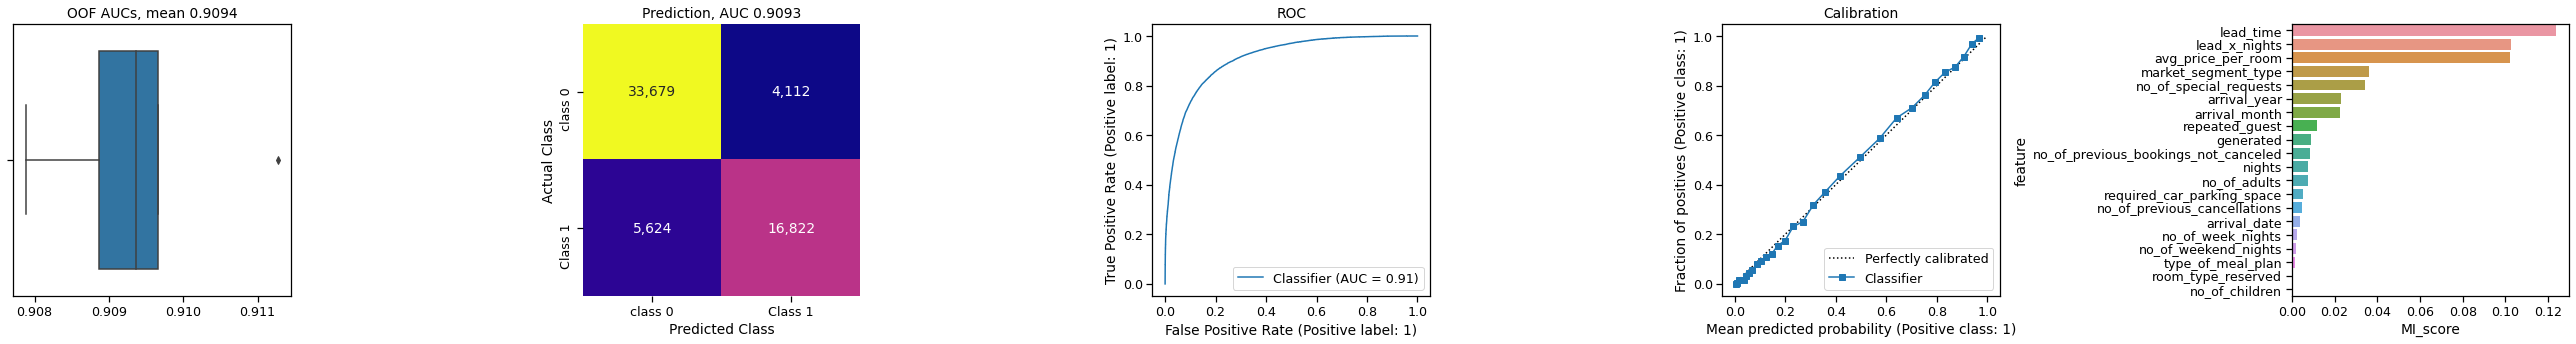

OOF mean AUC:   0.9094
AUC:            0.9093

---------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     37791
           1       0.80      0.75      0.78     22446

    accuracy                           0.84     60237
   macro avg       0.83      0.82      0.82     60237
weighted avg       0.84      0.84      0.84     60237



,Dataset,Mean OOF ROC AUC,ROC AUC,Accuracy Score,Precision Score,Recall Score,f1 Score,Matthews Corr Coef
Model,,,,,,,,
LGBM_CLF,base,0.9094,0.9093,0.8384,0.837,0.8384,0.8371,0.6505


(716,) corrected


In [179]:
def lgbm_clf(train_labels, val_labels, train_features, val_features, TEST_FEATURES):
    model = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
    model.fit(
        train_features, train_labels,
        eval_set=[(val_features, val_labels)])
    val_proba = model.predict_proba(val_features)[:,-1]
    TEST_PROBA = model.predict_proba(TEST_FEATURES)[:,-1]
    return 'LGBM_CLF', val_proba, TEST_PROBA

if base:
    sc, _ = CV(lgbm_clf, train, test)
    scores['lgb base'] = sc
    

In [181]:
from catboost import CatBoostClassifier

Fold 0 0.91478
Fold 1 0.91239
Fold 2 0.91348
Fold 3 0.91657
Fold 4 0.91457

 CatBoost_CLF Performance:



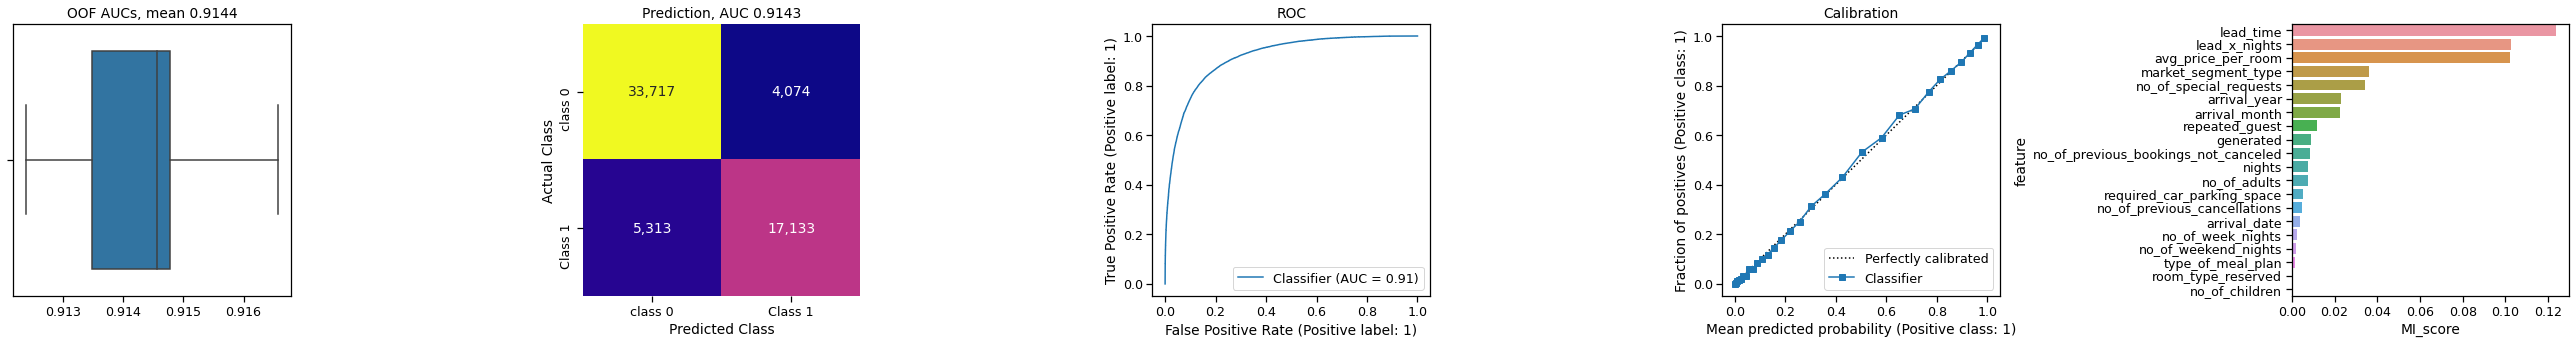

OOF mean AUC:   0.9144
AUC:            0.9143

---------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     37791
           1       0.81      0.76      0.78     22446

    accuracy                           0.84     60237
   macro avg       0.84      0.83      0.83     60237
weighted avg       0.84      0.84      0.84     60237



,Dataset,Mean OOF ROC AUC,ROC AUC,Accuracy Score,Precision Score,Recall Score,f1 Score,Matthews Corr Coef
Model,,,,,,,,
CatBoost_CLF,base,0.9144,0.9143,0.8442,0.843,0.8442,0.8432,0.6636


(716,) corrected


In [183]:
def catb_clf(train_labels, val_labels, train_features, val_features, TEST_FEATURES):
    model = CatBoostClassifier(verbose=0, random_state=42)
    model.fit(
        train_features, train_labels,
        eval_set=[(val_features, val_labels)],
        early_stopping_rounds = 50
    )
    val_proba = model.predict_proba(val_features)[:,-1]
    TEST_PROBA = model.predict_proba(TEST_FEATURES)[:,-1]
    return 'CatBoost_CLF', val_proba, TEST_PROBA

if base:
    sc, _ = CV(catb_clf, train, test)
    scores['cat base'] = sc

In [184]:
from xgboost import XGBClassifier

Fold 0 

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.91536
Fold 1 

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.91120
Fold 2 

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.91279
Fold 3 

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.91501
Fold 4 

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.91393

 XGB_CLF Performance:



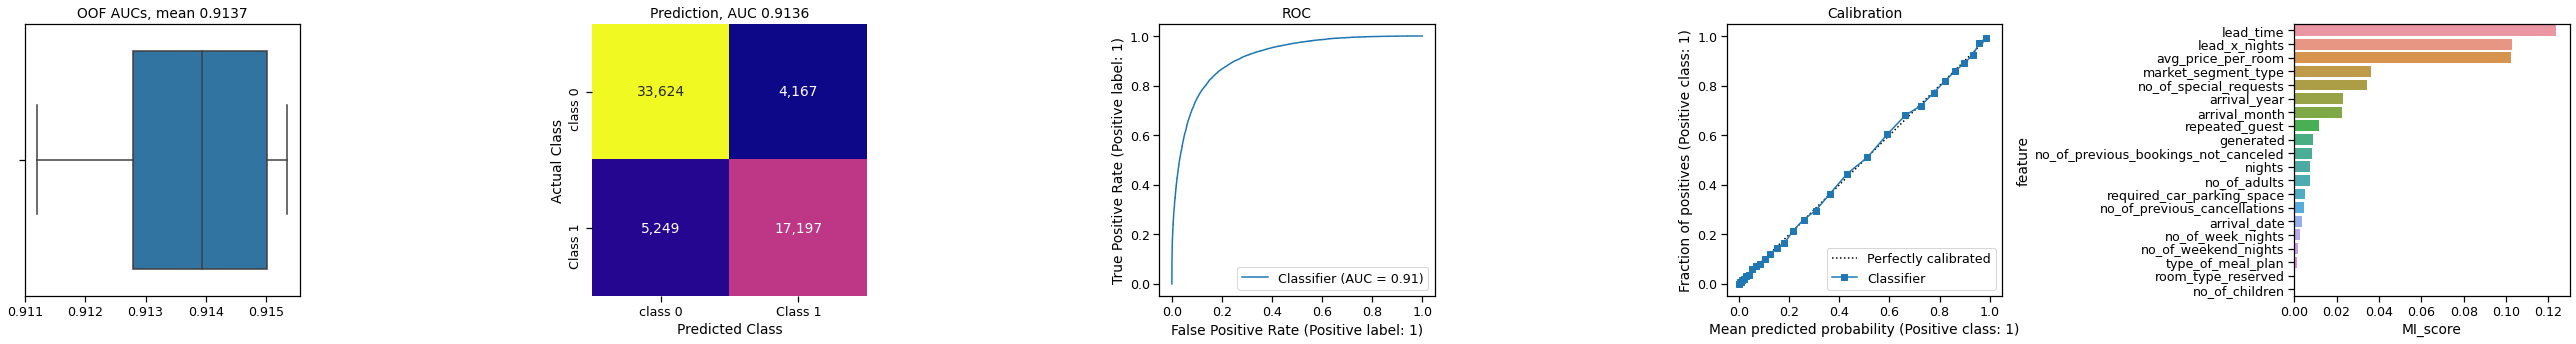

OOF mean AUC:   0.9137
AUC:            0.9136

---------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     37791
           1       0.80      0.77      0.79     22446

    accuracy                           0.84     60237
   macro avg       0.83      0.83      0.83     60237
weighted avg       0.84      0.84      0.84     60237



,Dataset,Mean OOF ROC AUC,ROC AUC,Accuracy Score,Precision Score,Recall Score,f1 Score,Matthews Corr Coef
Model,,,,,,,,
XGB_CLF,base,0.9137,0.9136,0.8437,0.8426,0.8437,0.8429,0.6629


(716,) corrected


In [185]:

def xgb_clf(train_labels, val_labels, train_features, val_features, TEST_FEATURES):

    model = XGBClassifier()
    
    model.fit(
        train_features, train_labels,
        eval_set=[(train_features, train_labels), (val_features, val_labels)],
        early_stopping_rounds = 300,
        verbose=0,
    )
    val_proba = model.predict_proba(val_features)[:,1]
    val_score = roc_auc_score(val_labels, val_proba)
    
    TEST_PROBA = model.predict_proba(TEST_FEATURES)[:,1]
    return 'XGB_CLF', val_proba, TEST_PROBA

if base:
    sc, _ = CV(xgb_clf, train, test, folds=5)
    scores['xgb base'] = sc

In [186]:
from functools import partial
import scipy as sp

class Averager(object):
    
    def __init__(self, method='nelder-mead', options={}):
        self.weights_ = []
        self.opt_ = ''
        self.method_ = method
        self.options_ = options

    def _weighted_average(self, weights, values):
        qty = len(values)
        sum_values = values[0] * weights[0]
        sum_weights = weights[0]
        for i in range(1, qty):
            sum_values += values[i] * weights[i]
            sum_weights += weights[i]
        return sum_values / sum_weights

    def _auc_score(self, weights, values, true_labels):
        proba = self._weighted_average(weights, values)
        return -roc_auc_score(true_labels, proba)

    def fit(self, values, true_labels):
        qty = len(values)
        initial_weights = [1 for _ in range(qty)]
        auc_score_partial = partial(self._auc_score, values=values, true_labels=true_labels)
        self.opt_ = sp.optimize.minimize(auc_score_partial, initial_weights, method=self.method_, options=self.options_)
        self.weights_ = self.opt_['x']
        
    def predict(self, values):
        assert len(self.weights_) == len(values), 'Averager error, must be fitted before predict'
        return self._weighted_average(self.weights_, values)
    
    def fit_predict(self, values, true_labels):
        self.fit(values, true_labels)
        return self.predict(values)
    
    def weights(self):
        return self.weights_

    def optimization(self):
        return self.opt_

In [187]:
compare = {}

Fold 0 

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9154 [1]	valid_0's binary_logloss: 0.620295
[2]	valid_0's binary_logloss: 0.588253
[3]	valid_0's binary_logloss: 0.561834
[4]	valid_0's binary_logloss: 0.539623
[5]	valid_0's binary_logloss: 0.521246
[6]	valid_0's binary_logloss: 0.505453
[7]	valid_0's binary_logloss: 0.491992
[8]	valid_0's binary_logloss: 0.480058
[9]	valid_0's binary_logloss: 0.47003
[10]	valid_0's binary_logloss: 0.461457
[11]	valid_0's binary_logloss: 0.454243
[12]	valid_0's binary_logloss: 0.447851
[13]	valid_0's binary_logloss: 0.4421
[14]	valid_0's binary_logloss: 0.436764
[15]	valid_0's binary_logloss: 0.432454
[16]	valid_0's binary_logloss: 0.42833
[17]	valid_0's binary_logloss: 0.424243
[18]	valid_0's binary_logloss: 0.420994
[19]	valid_0's binary_logloss: 0.417734
[20]	valid_0's binary_logloss: 0.414742
[21]	valid_0's binary_logloss: 0.411823
[22]	valid_0's binary_logloss: 0.409257
[23]	valid_0's binary_logloss: 0.4068
[24]	valid_0's binary_logloss: 0.404946
[25]	valid_0's binary_logloss: 0.40276
[26]	vali

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9112 [1]	valid_0's binary_logloss: 0.620975
[2]	valid_0's binary_logloss: 0.589519
[3]	valid_0's binary_logloss: 0.563543
[4]	valid_0's binary_logloss: 0.541954
[5]	valid_0's binary_logloss: 0.524002
[6]	valid_0's binary_logloss: 0.508404
[7]	valid_0's binary_logloss: 0.495378
[8]	valid_0's binary_logloss: 0.484147
[9]	valid_0's binary_logloss: 0.474178
[10]	valid_0's binary_logloss: 0.465547
[11]	valid_0's binary_logloss: 0.458207
[12]	valid_0's binary_logloss: 0.452121
[13]	valid_0's binary_logloss: 0.446038
[14]	valid_0's binary_logloss: 0.440281
[15]	valid_0's binary_logloss: 0.435459
[16]	valid_0's binary_logloss: 0.431545
[17]	valid_0's binary_logloss: 0.427688
[18]	valid_0's binary_logloss: 0.424419
[19]	valid_0's binary_logloss: 0.421606
[20]	valid_0's binary_logloss: 0.418454
[21]	valid_0's binary_logloss: 0.415883
[22]	valid_0's binary_logloss: 0.413333
[23]	valid_0's binary_logloss: 0.410991
[24]	valid_0's binary_logloss: 0.408425
[25]	valid_0's binary_logloss: 0.406379
[2

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9128 [1]	valid_0's binary_logloss: 0.621197
[2]	valid_0's binary_logloss: 0.589355
[3]	valid_0's binary_logloss: 0.563202
[4]	valid_0's binary_logloss: 0.541718
[5]	valid_0's binary_logloss: 0.523271
[6]	valid_0's binary_logloss: 0.507967
[7]	valid_0's binary_logloss: 0.494616
[8]	valid_0's binary_logloss: 0.483418
[9]	valid_0's binary_logloss: 0.473868
[10]	valid_0's binary_logloss: 0.465425
[11]	valid_0's binary_logloss: 0.458106
[12]	valid_0's binary_logloss: 0.451395
[13]	valid_0's binary_logloss: 0.445683
[14]	valid_0's binary_logloss: 0.440549
[15]	valid_0's binary_logloss: 0.435968
[16]	valid_0's binary_logloss: 0.431748
[17]	valid_0's binary_logloss: 0.428053
[18]	valid_0's binary_logloss: 0.424585
[19]	valid_0's binary_logloss: 0.421552
[20]	valid_0's binary_logloss: 0.418603
[21]	valid_0's binary_logloss: 0.415982
[22]	valid_0's binary_logloss: 0.413423
[23]	valid_0's binary_logloss: 0.411365
[24]	valid_0's binary_logloss: 0.409173
[25]	valid_0's binary_logloss: 0.407243
[2

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9150 [1]	valid_0's binary_logloss: 0.619995
[2]	valid_0's binary_logloss: 0.587675
[3]	valid_0's binary_logloss: 0.561084
[4]	valid_0's binary_logloss: 0.538988
[5]	valid_0's binary_logloss: 0.520415
[6]	valid_0's binary_logloss: 0.504581
[7]	valid_0's binary_logloss: 0.491348
[8]	valid_0's binary_logloss: 0.480098
[9]	valid_0's binary_logloss: 0.470673
[10]	valid_0's binary_logloss: 0.461718
[11]	valid_0's binary_logloss: 0.45411
[12]	valid_0's binary_logloss: 0.447266
[13]	valid_0's binary_logloss: 0.441331
[14]	valid_0's binary_logloss: 0.436431
[15]	valid_0's binary_logloss: 0.431546
[16]	valid_0's binary_logloss: 0.427006
[17]	valid_0's binary_logloss: 0.42308
[18]	valid_0's binary_logloss: 0.419392
[19]	valid_0's binary_logloss: 0.4164
[20]	valid_0's binary_logloss: 0.413651
[21]	valid_0's binary_logloss: 0.410817
[22]	valid_0's binary_logloss: 0.4085
[23]	valid_0's binary_logloss: 0.405955
[24]	valid_0's binary_logloss: 0.403725
[25]	valid_0's binary_logloss: 0.401814
[26]	val

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9139 [1]	valid_0's binary_logloss: 0.620966
[2]	valid_0's binary_logloss: 0.589199
[3]	valid_0's binary_logloss: 0.563355
[4]	valid_0's binary_logloss: 0.541257
[5]	valid_0's binary_logloss: 0.523205
[6]	valid_0's binary_logloss: 0.507861
[7]	valid_0's binary_logloss: 0.494153
[8]	valid_0's binary_logloss: 0.48243
[9]	valid_0's binary_logloss: 0.472389
[10]	valid_0's binary_logloss: 0.46415
[11]	valid_0's binary_logloss: 0.456576
[12]	valid_0's binary_logloss: 0.449981
[13]	valid_0's binary_logloss: 0.444235
[14]	valid_0's binary_logloss: 0.438772
[15]	valid_0's binary_logloss: 0.433955
[16]	valid_0's binary_logloss: 0.429682
[17]	valid_0's binary_logloss: 0.425745
[18]	valid_0's binary_logloss: 0.422224
[19]	valid_0's binary_logloss: 0.419176
[20]	valid_0's binary_logloss: 0.416384
[21]	valid_0's binary_logloss: 0.414066
[22]	valid_0's binary_logloss: 0.411076
[23]	valid_0's binary_logloss: 0.408833
[24]	valid_0's binary_logloss: 0.406684
[25]	valid_0's binary_logloss: 0.404669
[26]

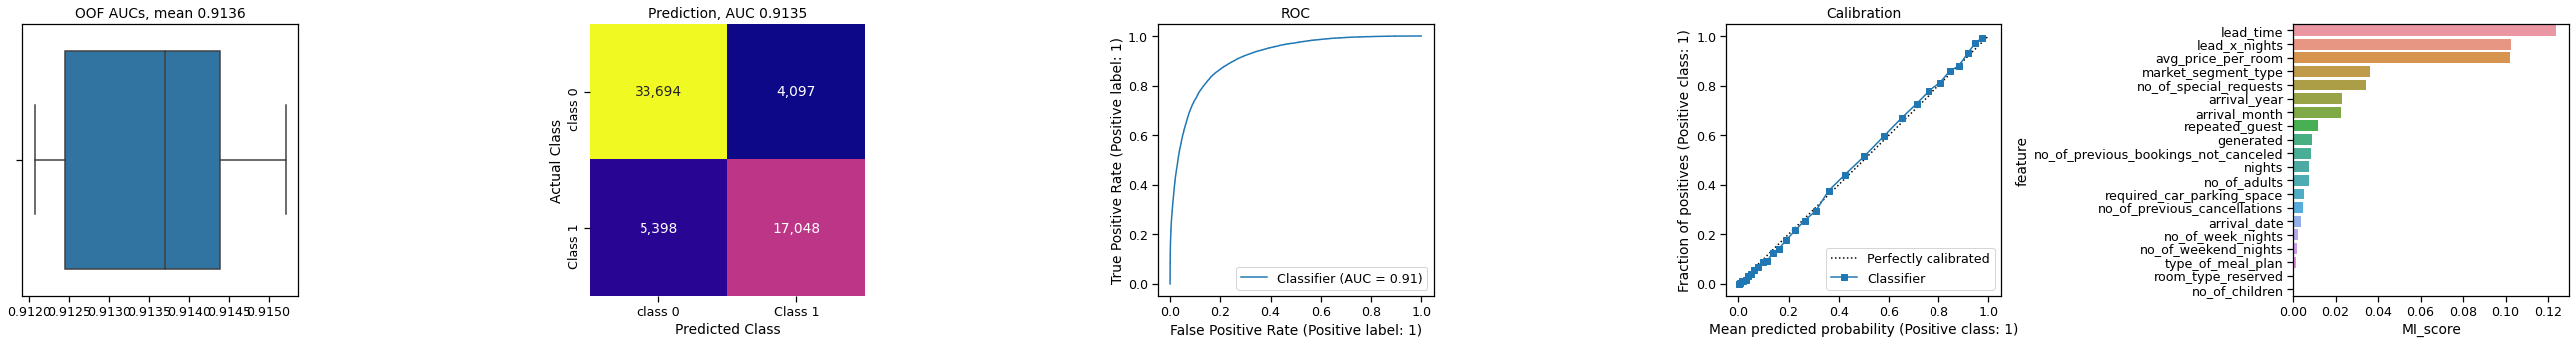

OOF mean AUC:   0.9136
AUC:            0.9135

---------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     37791
           1       0.81      0.76      0.78     22446

    accuracy                           0.84     60237
   macro avg       0.83      0.83      0.83     60237
weighted avg       0.84      0.84      0.84     60237



,Dataset,Mean OOF ROC AUC,ROC AUC,Accuracy Score,Precision Score,Recall Score,f1 Score,Matthews Corr Coef
Model,,,,,,,,
LGB_XGB_CLF_MEAN,base,0.9136,0.9135,0.8424,0.8412,0.8424,0.8414,0.6596


(716,) corrected


In [190]:
### LGBM + XGB

def lgb_xgb_clf_mean(train_labels, val_labels, train_features, val_features, TEST_FEATURES):

    watchlist = [(train_features, train_labels), (val_features, val_labels)]
    model1 = XGBClassifier()
    model1.fit(
        train_features, train_labels,
        eval_set=watchlist,
        early_stopping_rounds =300,
        verbose=0,
    )
    val_proba1 = model1.predict_proba(val_features)[:,1]
    val_score1 = roc_auc_score(val_labels, val_proba1)
    print(f'{val_score1:.4f}', end=' ')

    model2 = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
    model2.fit(
        train_features, train_labels,
        eval_set=[(val_features, val_labels)])
    val_proba2 = model2.predict_proba(val_features)[:,-1]
    val_score2 = roc_auc_score(val_labels, val_proba2)    
    print(f'{val_score2:.4f}', end=' ')
    
    val_proba = (val_proba1 + val_proba2) / 2
    
    TEST_PROBA = (model1.predict_proba(TEST_FEATURES)[:,1] + model2.predict_proba(TEST_FEATURES)[:,1]) / 2
   
    return 'LGB_XGB_CLF_MEAN', val_proba, TEST_PROBA

if cv:
    sc, _ = CV(lgb_xgb_clf_mean, train, test)
    scores['lgb xgb mean'] = sc
    compare['Ensemble with MEAN'] = sc

Fold 0 

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9154 [1]	valid_0's binary_logloss: 0.620295
[2]	valid_0's binary_logloss: 0.588253
[3]	valid_0's binary_logloss: 0.561834
[4]	valid_0's binary_logloss: 0.539623
[5]	valid_0's binary_logloss: 0.521246
[6]	valid_0's binary_logloss: 0.505453
[7]	valid_0's binary_logloss: 0.491992
[8]	valid_0's binary_logloss: 0.480058
[9]	valid_0's binary_logloss: 0.47003
[10]	valid_0's binary_logloss: 0.461457
[11]	valid_0's binary_logloss: 0.454243
[12]	valid_0's binary_logloss: 0.447851
[13]	valid_0's binary_logloss: 0.4421
[14]	valid_0's binary_logloss: 0.436764
[15]	valid_0's binary_logloss: 0.432454
[16]	valid_0's binary_logloss: 0.42833
[17]	valid_0's binary_logloss: 0.424243
[18]	valid_0's binary_logloss: 0.420994
[19]	valid_0's binary_logloss: 0.417734
[20]	valid_0's binary_logloss: 0.414742
[21]	valid_0's binary_logloss: 0.411823
[22]	valid_0's binary_logloss: 0.409257
[23]	valid_0's binary_logloss: 0.4068
[24]	valid_0's binary_logloss: 0.404946
[25]	valid_0's binary_logloss: 0.40276
[26]	vali

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9112 [1]	valid_0's binary_logloss: 0.620975
[2]	valid_0's binary_logloss: 0.589519
[3]	valid_0's binary_logloss: 0.563543
[4]	valid_0's binary_logloss: 0.541954
[5]	valid_0's binary_logloss: 0.524002
[6]	valid_0's binary_logloss: 0.508404
[7]	valid_0's binary_logloss: 0.495378
[8]	valid_0's binary_logloss: 0.484147
[9]	valid_0's binary_logloss: 0.474178
[10]	valid_0's binary_logloss: 0.465547
[11]	valid_0's binary_logloss: 0.458207
[12]	valid_0's binary_logloss: 0.452121
[13]	valid_0's binary_logloss: 0.446038
[14]	valid_0's binary_logloss: 0.440281
[15]	valid_0's binary_logloss: 0.435459
[16]	valid_0's binary_logloss: 0.431545
[17]	valid_0's binary_logloss: 0.427688
[18]	valid_0's binary_logloss: 0.424419
[19]	valid_0's binary_logloss: 0.421606
[20]	valid_0's binary_logloss: 0.418454
[21]	valid_0's binary_logloss: 0.415883
[22]	valid_0's binary_logloss: 0.413333
[23]	valid_0's binary_logloss: 0.410991
[24]	valid_0's binary_logloss: 0.408425
[25]	valid_0's binary_logloss: 0.406379
[2

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9128 [1]	valid_0's binary_logloss: 0.621197
[2]	valid_0's binary_logloss: 0.589355
[3]	valid_0's binary_logloss: 0.563202
[4]	valid_0's binary_logloss: 0.541718
[5]	valid_0's binary_logloss: 0.523271
[6]	valid_0's binary_logloss: 0.507967
[7]	valid_0's binary_logloss: 0.494616
[8]	valid_0's binary_logloss: 0.483418
[9]	valid_0's binary_logloss: 0.473868
[10]	valid_0's binary_logloss: 0.465425
[11]	valid_0's binary_logloss: 0.458106
[12]	valid_0's binary_logloss: 0.451395
[13]	valid_0's binary_logloss: 0.445683
[14]	valid_0's binary_logloss: 0.440549
[15]	valid_0's binary_logloss: 0.435968
[16]	valid_0's binary_logloss: 0.431748
[17]	valid_0's binary_logloss: 0.428053
[18]	valid_0's binary_logloss: 0.424585
[19]	valid_0's binary_logloss: 0.421552
[20]	valid_0's binary_logloss: 0.418603
[21]	valid_0's binary_logloss: 0.415982
[22]	valid_0's binary_logloss: 0.413423
[23]	valid_0's binary_logloss: 0.411365
[24]	valid_0's binary_logloss: 0.409173
[25]	valid_0's binary_logloss: 0.407243
[2

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9150 [1]	valid_0's binary_logloss: 0.619995
[2]	valid_0's binary_logloss: 0.587675
[3]	valid_0's binary_logloss: 0.561084
[4]	valid_0's binary_logloss: 0.538988
[5]	valid_0's binary_logloss: 0.520415
[6]	valid_0's binary_logloss: 0.504581
[7]	valid_0's binary_logloss: 0.491348
[8]	valid_0's binary_logloss: 0.480098
[9]	valid_0's binary_logloss: 0.470673
[10]	valid_0's binary_logloss: 0.461718
[11]	valid_0's binary_logloss: 0.45411
[12]	valid_0's binary_logloss: 0.447266
[13]	valid_0's binary_logloss: 0.441331
[14]	valid_0's binary_logloss: 0.436431
[15]	valid_0's binary_logloss: 0.431546
[16]	valid_0's binary_logloss: 0.427006
[17]	valid_0's binary_logloss: 0.42308
[18]	valid_0's binary_logloss: 0.419392
[19]	valid_0's binary_logloss: 0.4164
[20]	valid_0's binary_logloss: 0.413651
[21]	valid_0's binary_logloss: 0.410817
[22]	valid_0's binary_logloss: 0.4085
[23]	valid_0's binary_logloss: 0.405955
[24]	valid_0's binary_logloss: 0.403725
[25]	valid_0's binary_logloss: 0.401814
[26]	val

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9139 [1]	valid_0's binary_logloss: 0.620966
[2]	valid_0's binary_logloss: 0.589199
[3]	valid_0's binary_logloss: 0.563355
[4]	valid_0's binary_logloss: 0.541257
[5]	valid_0's binary_logloss: 0.523205
[6]	valid_0's binary_logloss: 0.507861
[7]	valid_0's binary_logloss: 0.494153
[8]	valid_0's binary_logloss: 0.48243
[9]	valid_0's binary_logloss: 0.472389
[10]	valid_0's binary_logloss: 0.46415
[11]	valid_0's binary_logloss: 0.456576
[12]	valid_0's binary_logloss: 0.449981
[13]	valid_0's binary_logloss: 0.444235
[14]	valid_0's binary_logloss: 0.438772
[15]	valid_0's binary_logloss: 0.433955
[16]	valid_0's binary_logloss: 0.429682
[17]	valid_0's binary_logloss: 0.425745
[18]	valid_0's binary_logloss: 0.422224
[19]	valid_0's binary_logloss: 0.419176
[20]	valid_0's binary_logloss: 0.416384
[21]	valid_0's binary_logloss: 0.414066
[22]	valid_0's binary_logloss: 0.411076
[23]	valid_0's binary_logloss: 0.408833
[24]	valid_0's binary_logloss: 0.406684
[25]	valid_0's binary_logloss: 0.404669
[26]

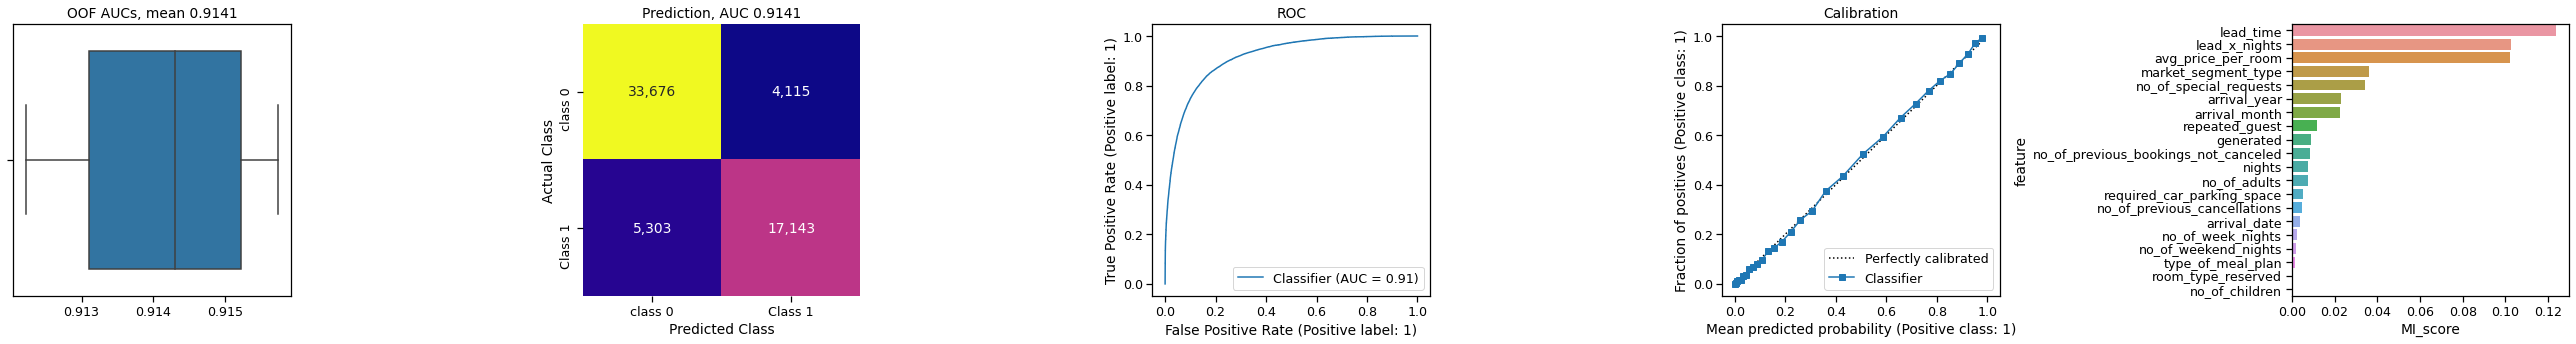

OOF mean AUC:   0.9141
AUC:            0.9141

---------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     37791
           1       0.81      0.76      0.78     22446

    accuracy                           0.84     60237
   macro avg       0.84      0.83      0.83     60237
weighted avg       0.84      0.84      0.84     60237



,Dataset,Mean OOF ROC AUC,ROC AUC,Accuracy Score,Precision Score,Recall Score,f1 Score,Matthews Corr Coef
Model,,,,,,,,
LGB_XGB_CLF_WEIGHTED,base,0.9141,0.9141,0.8437,0.8425,0.8437,0.8427,0.6626


(716,) corrected


In [191]:
### LGBM + XGB(Weighted)

def lgb_xgb_clf_weighted(train_labels, val_labels, train_features, val_features, TEST_FEATURES):

    watchlist = [(train_features, train_labels), (val_features, val_labels)]
    model1 = XGBClassifier()
    model1.fit(
        train_features, train_labels,
        eval_set=watchlist,
        early_stopping_rounds =300,
        verbose=0,
    )
    val_proba1 = model1.predict_proba(val_features)[:,1]
    val_score1 = roc_auc_score(val_labels, val_proba1)
    print(f'{val_score1:.4f}', end=' ')

    model2 = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
    model2.fit(
        train_features, train_labels,
        eval_set=[(val_features, val_labels)])
    val_proba2 = model2.predict_proba(val_features)[:,-1]
    val_score2 = roc_auc_score(val_labels, val_proba2)    
    print(f'{val_score2:.4f}', end=' ')

    val_probas = [val_proba1, val_proba2]
   
    avr = Averager()
    val_proba = avr.fit_predict(val_probas, val_labels)
    
    print(avr.weights(), end=' ')
    
    TEST_PROBA = avr.predict([model1.predict_proba(TEST_FEATURES)[:,1], model2.predict_proba(TEST_FEATURES)[:,1]])
   
    return 'LGB_XGB_CLF_WEIGHTED', val_proba, TEST_PROBA

if cv:
    sc, _ = CV(lgb_xgb_clf_weighted, train, test)
    scores['lgb xgb weighted'] = sc
    compare['Ensemble with AVERAGER'] = sc    

In [192]:
### Mean VS Averager

if cv:
    display_scores(compare)

,Dataset,Mean OOF ROC AUC,ROC AUC,Accuracy Score,Precision Score,Recall Score,f1 Score,Matthews Corr Coef
Model,,,,,,,,
LGB_XGB_CLF_MEAN,base,0.913600,0.913500,0.842400,0.841200,0.842400,0.841400,0.659600
LGB_XGB_CLF_WEIGHTED,base,0.914100,0.914100,0.843700,0.842500,0.843700,0.842700,0.662600


Fold 0 

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9163 [1]	valid_0's auc: 0.803176
[2]	valid_0's auc: 0.823246
[3]	valid_0's auc: 0.823951
[4]	valid_0's auc: 0.848212
[5]	valid_0's auc: 0.850417
[6]	valid_0's auc: 0.853619
[7]	valid_0's auc: 0.85373
[8]	valid_0's auc: 0.854182
[9]	valid_0's auc: 0.853564
[10]	valid_0's auc: 0.859435
[11]	valid_0's auc: 0.860275
[12]	valid_0's auc: 0.861653
[13]	valid_0's auc: 0.860827
[14]	valid_0's auc: 0.861874
[15]	valid_0's auc: 0.861896
[16]	valid_0's auc: 0.862277
[17]	valid_0's auc: 0.862093
[18]	valid_0's auc: 0.862184
[19]	valid_0's auc: 0.862148
[20]	valid_0's auc: 0.862807
[21]	valid_0's auc: 0.862828
[22]	valid_0's auc: 0.863691
[23]	valid_0's auc: 0.864271
[24]	valid_0's auc: 0.864294
[25]	valid_0's auc: 0.864514
[26]	valid_0's auc: 0.864493
[27]	valid_0's auc: 0.864696
[28]	valid_0's auc: 0.865793
[29]	valid_0's auc: 0.865778
[30]	valid_0's auc: 0.866304
[31]	valid_0's auc: 0.867448
[32]	valid_0's auc: 0.867235
[33]	valid_0's auc: 0.867645
[34]	valid_0's auc: 0.86805
[35]	valid_0's auc

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9128 

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


0.9137 [ 2.46821558  2.59764593  0.58762402  0.60544729  0.49420618 -0.28629202] 0.91832
Fold 1 

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9131 [1]	valid_0's auc: 0.808858
[2]	valid_0's auc: 0.82443
[3]	valid_0's auc: 0.826719
[4]	valid_0's auc: 0.841135
[5]	valid_0's auc: 0.843419
[6]	valid_0's auc: 0.843083
[7]	valid_0's auc: 0.846338
[8]	valid_0's auc: 0.846064
[9]	valid_0's auc: 0.843733
[10]	valid_0's auc: 0.850278
[11]	valid_0's auc: 0.850658
[12]	valid_0's auc: 0.851013
[13]	valid_0's auc: 0.8519
[14]	valid_0's auc: 0.853078
[15]	valid_0's auc: 0.853515
[16]	valid_0's auc: 0.852809
[17]	valid_0's auc: 0.853152
[18]	valid_0's auc: 0.853514
[19]	valid_0's auc: 0.852969
[20]	valid_0's auc: 0.853782
[21]	valid_0's auc: 0.854798
[22]	valid_0's auc: 0.856138
[23]	valid_0's auc: 0.85654
[24]	valid_0's auc: 0.856588
[25]	valid_0's auc: 0.857159
[26]	valid_0's auc: 0.857245
[27]	valid_0's auc: 0.857737
[28]	valid_0's auc: 0.858217
[29]	valid_0's auc: 0.85858
[30]	valid_0's auc: 0.859126
[31]	valid_0's auc: 0.859697
[32]	valid_0's auc: 0.860195
[33]	valid_0's auc: 0.860833
[34]	valid_0's auc: 0.860813
[35]	valid_0's auc: 0

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9092 

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


0.9105 [ 2.75666502  2.08431143  0.98214924  0.78476069  0.63286122 -0.16095171] 0.91433
Fold 2 

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9159 [1]	valid_0's auc: 0.801675
[2]	valid_0's auc: 0.822339
[3]	valid_0's auc: 0.823605
[4]	valid_0's auc: 0.847966
[5]	valid_0's auc: 0.848318
[6]	valid_0's auc: 0.850466
[7]	valid_0's auc: 0.851765
[8]	valid_0's auc: 0.851965
[9]	valid_0's auc: 0.851208
[10]	valid_0's auc: 0.857459
[11]	valid_0's auc: 0.857872
[12]	valid_0's auc: 0.858378
[13]	valid_0's auc: 0.858648
[14]	valid_0's auc: 0.859085
[15]	valid_0's auc: 0.858575
[16]	valid_0's auc: 0.858701
[17]	valid_0's auc: 0.859847
[18]	valid_0's auc: 0.860714
[19]	valid_0's auc: 0.860693
[20]	valid_0's auc: 0.860863
[21]	valid_0's auc: 0.861575
[22]	valid_0's auc: 0.862704
[23]	valid_0's auc: 0.86318
[24]	valid_0's auc: 0.863541
[25]	valid_0's auc: 0.863527
[26]	valid_0's auc: 0.863825
[27]	valid_0's auc: 0.864123
[28]	valid_0's auc: 0.864457
[29]	valid_0's auc: 0.864566
[30]	valid_0's auc: 0.86521
[31]	valid_0's auc: 0.865615
[32]	valid_0's auc: 0.866338
[33]	valid_0's auc: 0.866996
[34]	valid_0's auc: 0.867136
[35]	valid_0's auc

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9124 

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


0.9130 [ 3.39638805  1.86732179  1.32735156  0.60693319  1.01548374 -0.03374375] 0.91762
Fold 3 

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9175 [1]	valid_0's auc: 0.810571
[2]	valid_0's auc: 0.829553
[3]	valid_0's auc: 0.830226
[4]	valid_0's auc: 0.848699
[5]	valid_0's auc: 0.850024
[6]	valid_0's auc: 0.851788
[7]	valid_0's auc: 0.85268
[8]	valid_0's auc: 0.854339
[9]	valid_0's auc: 0.852629
[10]	valid_0's auc: 0.860136
[11]	valid_0's auc: 0.860179
[12]	valid_0's auc: 0.86019
[13]	valid_0's auc: 0.860224
[14]	valid_0's auc: 0.860009
[15]	valid_0's auc: 0.861174
[16]	valid_0's auc: 0.861278
[17]	valid_0's auc: 0.862415
[18]	valid_0's auc: 0.862504
[19]	valid_0's auc: 0.862718
[20]	valid_0's auc: 0.863058
[21]	valid_0's auc: 0.862987
[22]	valid_0's auc: 0.863581
[23]	valid_0's auc: 0.864093
[24]	valid_0's auc: 0.864565
[25]	valid_0's auc: 0.864838
[26]	valid_0's auc: 0.865455
[27]	valid_0's auc: 0.865737
[28]	valid_0's auc: 0.866482
[29]	valid_0's auc: 0.866561
[30]	valid_0's auc: 0.867251
[31]	valid_0's auc: 0.86758
[32]	valid_0's auc: 0.867949
[33]	valid_0's auc: 0.868656
[34]	valid_0's auc: 0.868789
[35]	valid_0's auc:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9145 

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


0.9160 [ 1.86470715  1.78121412  2.16766633 -0.38080737  0.46778917  0.67179718] 0.91952
Fold 4 

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9157 [1]	valid_0's auc: 0.799077
[2]	valid_0's auc: 0.821101
[3]	valid_0's auc: 0.822617
[4]	valid_0's auc: 0.846543
[5]	valid_0's auc: 0.848723
[6]	valid_0's auc: 0.851425
[7]	valid_0's auc: 0.851168
[8]	valid_0's auc: 0.852552
[9]	valid_0's auc: 0.851017
[10]	valid_0's auc: 0.857893
[11]	valid_0's auc: 0.857973
[12]	valid_0's auc: 0.858074
[13]	valid_0's auc: 0.858138
[14]	valid_0's auc: 0.857882
[15]	valid_0's auc: 0.859697
[16]	valid_0's auc: 0.859553
[17]	valid_0's auc: 0.860068
[18]	valid_0's auc: 0.860203
[19]	valid_0's auc: 0.860346
[20]	valid_0's auc: 0.860903
[21]	valid_0's auc: 0.861117
[22]	valid_0's auc: 0.861835
[23]	valid_0's auc: 0.86208
[24]	valid_0's auc: 0.862572
[25]	valid_0's auc: 0.86288
[26]	valid_0's auc: 0.863238
[27]	valid_0's auc: 0.863364
[28]	valid_0's auc: 0.864074
[29]	valid_0's auc: 0.863994
[30]	valid_0's auc: 0.86467
[31]	valid_0's auc: 0.865192
[32]	valid_0's auc: 0.865304
[33]	valid_0's auc: 0.865931
[34]	valid_0's auc: 0.866062
[35]	valid_0's auc:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


0.9101 

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


0.9118 [2.35769933 0.22368556 2.66746802 0.13441657 0.01968897 0.22959904] 0.91736

 ensemble_WEIGHTED Performance:



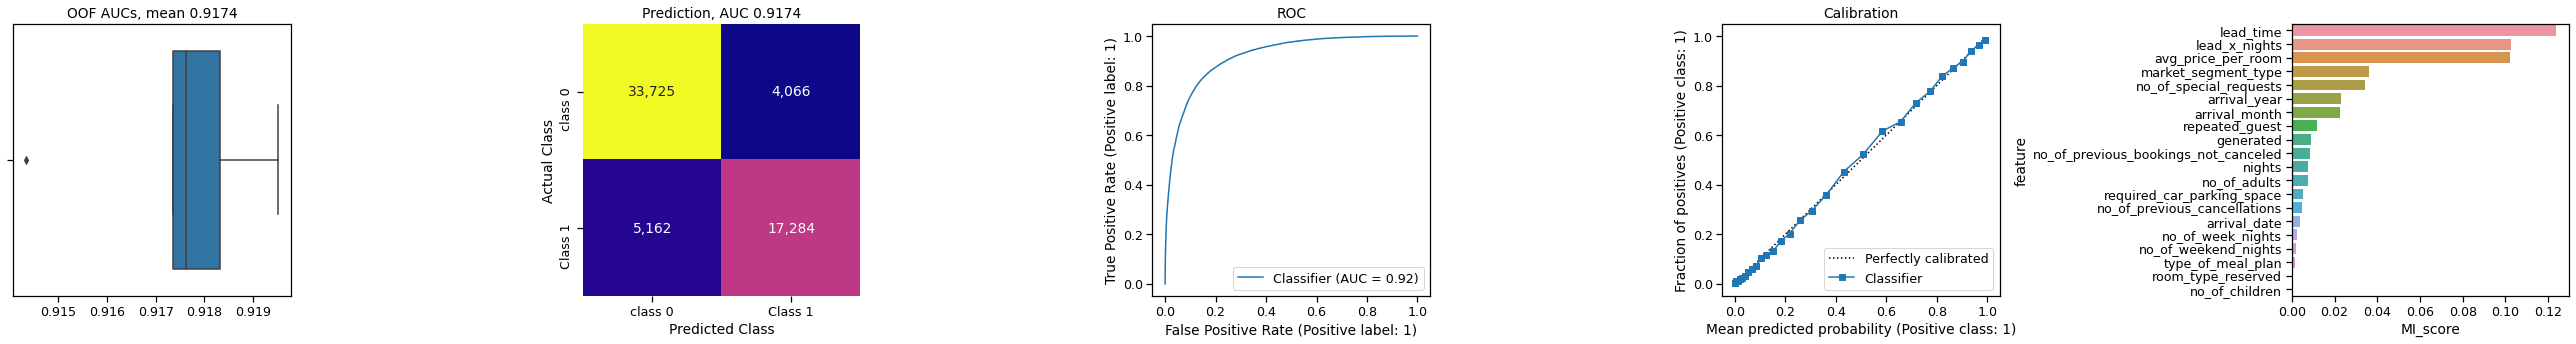

OOF mean AUC:   0.9174
AUC:            0.9174

---------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     37791
           1       0.81      0.77      0.79     22446

    accuracy                           0.85     60237
   macro avg       0.84      0.83      0.83     60237
weighted avg       0.85      0.85      0.85     60237



,Dataset,Mean OOF ROC AUC,ROC AUC,Accuracy Score,Precision Score,Recall Score,f1 Score,Matthews Corr Coef
Model,,,,,,,,
ensemble_WEIGHTED,base,0.9174,0.9174,0.8468,0.8458,0.8468,0.846,0.6696


(716,) corrected


In [195]:
from xgboost import XGBClassifier, XGBRegressor
import lightgbm as lgbm
import catboost
from lightgbm import LGBMRegressor

cbc_params = {'iterations': 5000, #164,
              'max_depth': 5, #10,
              'learning_rate': 0.05, #0.1, 
              'verbose': 0,
              'eval_metric': 'AUC',
              'loss_function': 'Logloss',
             }

gbc_params = {'n_estimators': 5000, 
              'max_depth': 5, #10, 
              'num_leaves': 8,
              'learning_rate': 0.05, #0.1, 
              'subsample': 0.8501198417003352,
              'reg_alpha': 3,
              'reg_lambda': 3,
               'subsample': 0.8, 
               'colsample_bytree': 0.8,
              'objective': 'binary',
              'metric': 'auc',
             }

cbr_params = {'iterations': 2000, 
              'max_depth': 7,
              'learning_rate': 0.05, #0.1, # 0.05, 
              'verbose': 0,
             }

lgbr_params = {'n_estimators': 10000, 
               'metric': 'rmse',
               'max_depth': 8, #10, #8
               'num_leaves': 8,
               'learning_rate': 0.1, #0.05, # 0.1
               'subsample': 0.944652288803578,
               'reg_alpha': 3,
               'reg_lambda': 3,
               'subsample': 0.8, 
               'colsample_bytree': 0.8,
              }

def ensemble_weighted(train_labels, val_labels, train_features, val_features, TEST_FEATURES):

    watchlist = [(train_features, train_labels), (val_features, val_labels)]
    model1 = XGBClassifier(n_estimators=2000, n_jobs=-1, max_depth=4, eta=0.2, colsample_bytree=0.67)
    model1.fit(
        train_features, train_labels,
        eval_set=watchlist,
        early_stopping_rounds =300,
        verbose=0,
    )
    val_proba1 = model1.predict_proba(val_features)[:,1]
    val_score1 = roc_auc_score(val_labels, val_proba1)
    print(f'{val_score1:.4f}', end=' ')

    model2 = LGBMClassifier(**gbc_params, random_state=42, n_jobs=-1, verbose=-1)
    model2.fit(
        train_features, train_labels,
        eval_set=[(val_features, val_labels)])
    val_proba2 = model2.predict_proba(val_features)[:,-1]
    val_score2 = roc_auc_score(val_labels, val_proba2)    
    print(f'{val_score2:.4f}', end=' ')
    
    model3 = catboost.CatBoostClassifier(**cbc_params, random_state=42)
    model3.fit(
        train_features, train_labels,
        eval_set=[(val_features, val_labels)],
        early_stopping_rounds = 100
    )
    val_proba3 = model3.predict_proba(val_features)[:,-1]
    val_score3 = roc_auc_score(val_labels, val_proba3)    
    print(f'{val_score3:.4f}', end=' ')
   
    model4 = catboost.CatBoostRegressor(**cbr_params, random_state=42)
    model4.fit(
        train_features, train_labels,
        eval_set=[(val_features, val_labels)],
        early_stopping_rounds = 100
    )
    val_proba4 = model4.predict(val_features)
    val_score4 = roc_auc_score(val_labels, val_proba4)    
    print(f'{val_score4:.4f}', end=' ')
    
    watchlist = [(train_features, train_labels), (val_features, val_labels)]
    model5 = XGBRegressor(n_estimators=2000, n_jobs=-1, max_depth=4, eta=0.2, colsample_bytree=0.67)
    model5.fit(
        train_features, train_labels,
        eval_set=watchlist,
        early_stopping_rounds =300,
        verbose=0,
    )
    val_proba5 = model5.predict(val_features)
    val_score5 = roc_auc_score(val_labels, val_proba5)
    print(f'{val_score5:.4f}', end=' ')
   
    model6 = LGBMRegressor(**lgbr_params, random_state=42)
    model6.fit(
        train_features, train_labels,
        eval_set=[(val_features, val_labels)],
        early_stopping_rounds = 100,
        verbose=False
    )
    val_proba6 = model6.predict(val_features)
    val_score6 = roc_auc_score(val_labels, val_proba6)    
    print(f'{val_score6:.4f}', end=' ')

    val_probas = [val_proba1, val_proba2, val_proba3, val_proba4, val_proba5, val_proba6]
    
    avr = Averager()
    val_proba = avr.fit_predict(val_probas, val_labels)
    
    print(avr.weights(), end=' ')
    
    TEST_PROBA = avr.predict([model1.predict_proba(TEST_FEATURES)[:,1], model2.predict_proba(TEST_FEATURES)[:,1], model3.predict_proba(TEST_FEATURES)[:,1], model4.predict(TEST_FEATURES), model5.predict(TEST_FEATURES), model6.predict(TEST_FEATURES)]) #, np.array(model7.predict(test_ds, verbose=0)[:,0])])
   
    return 'ensemble_WEIGHTED', val_proba, TEST_PROBA

if cv:
    sc, _ = CV(ensemble_weighted, train, test)
    scores['six weighted'] = sc

In [196]:
if cv:
    display_scores(scores)

,Dataset,Mean OOF ROC AUC,ROC AUC,Accuracy Score,Precision Score,Recall Score,f1 Score,Matthews Corr Coef
Model,,,,,,,,
LGBM_CLF,base,0.909400,0.909300,0.838400,0.837000,0.838400,0.837100,0.650500
CatBoost_CLF,base,0.914400,0.914300,0.844200,0.843000,0.844200,0.843200,0.663600
XGB_CLF,base,0.913700,0.913600,0.843700,0.842600,0.843700,0.842900,0.662900
LGB_XGB_CLF_MEAN,base,0.913600,0.913500,0.842400,0.841200,0.842400,0.841400,0.659600
LGB_XGB_CLF_WEIGHTED,base,0.914100,0.914100,0.843700,0.842500,0.843700,0.842700,0.662600
ensemble_WEIGHTED,base,0.917400,0.917400,0.846800,0.845800,0.846800,0.846000,0.669600


In [ ]:
LB = []

# sc, prediction = CV(xgb_clf, train_fe, test_fe, folds=10, split=0.2, seed=42)          # v.8 auc 0.9158 lb 0.9131
LB.append({'version':8, 'auc':0.9158, 'lb':0.9131, 'Model':'XGB_CLF'})

# sc, prediction = CV(lgb_xgb_clf_mean, train_fe, test_fe, folds=10, split=0.2, seed=42) # v.11 auc 0.9165 lb 0.9120
LB.append({'version':11, 'auc':0.9165, 'lb':0.9120, 'Model':'LGB_XGB_CLF_MEAN'})

# sc, prediction = CV(lgb_xgb_cat_clf_mean, train_fe, test_fe, folds=10, split=0.2, seed=42) # v.12 0.9165 lb 0.9125
LB.append({'version':12, 'auc':0.9165, 'lb':0.9125, 'Model':'LGB_XGB_CAT_CLF_MEAN'})

# sc, prediction = CV(lgb_xgb_cat_clf_weighted, train, test, folds=10, split=0.2, seed=42) # v.12 0.9165 lb 0.9125
LB.append({'version':13, 'auc':0.9171, 'lb':0.9133, 'Model':'LGB_XGB_CAT_CLF_WEIGHTED'})

# sc, prediction = CV(lgb_xgb_cat_clf_weighted, train, test, folds=5, repeats=6)
LB.append({'version':14, 'auc':0.916, 'lb':0.9132, 'Model':'LGB_XGB_CAT_CLF_WEIGHTED'})

# sc, prediction = CV(lgb_xgb_cat_clf_weighted, train, test, folds=10, repeats=3)
LB.append({'version':16, 'auc':0.9169, 'lb':0.91337, 'Model':'LGB_XGB_CAT_CLF_WEIGHTED'})

# sc, prediction = CV(lgb_xgb_cat_clf_weighted, train_fe, test_fe, folds=10, repeats=3)
LB.append({'version':17, 'auc':0.917, 'lb':0.91311, 'Model':'LGB_XGB_CAT_CLF_WEIGHTED+FE'})

# sc, prediction = CV(ensemble_weighted, train, test, folds=10, repeats=3)
LB.append({'version':18, 'auc':0.9171, 'lb':0.91424, 'Model':'LGB_XGB_CAT_CLF_WEIGHTED+FE'})

# sc, prediction = CV(ensemble_weighted, train, test, folds=10, repeats=3)
LB.append({'version':20, 'auc':0.9172, 'lb':0.91399, 'Model':'LGB_XGB_CAT_CLF_WEIGHTED+TFDT'})

# sc, prediction = CV(ensemble_weighted, train, test, folds=10, repeats=3)
LB.append({'version':21, 'auc':0.9187, 'lb':0.91329, 'Model':'LGB_XGB_CAT_CLF_WEIGHTED+nights,lead*nights'})

LB.append({'version':2, 'auc':0.9183, 'lb':0.92718, 'Model':'XGB_3_CLF_WEIGHTED+nights,leak'})

# sc, prediction = CV(ensemble_weighted, train, test, folds=10, repeats=3)
LB.append({'version':26, 'auc':0.9196, 'lb':0.92802, 'Model':'LGB_XGB_CAT_CLF_WEIGHTED,leak'})

# sc, prediction = CV(ensemble_weighted, train, test, folds=30, repeats=1)
LB.append({'version':29, 'auc':0.9209, 'lb':0.92817, 'Model':'LGB_XGB_CAT_CLF_WEIGHTED,leak'})

In [ ]:
train_g = pd.read_csv('/kaggle/input/playground-series-s3e7/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s3e7/test.csv', index_col='id')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e7/sample_submission.csv')
original = pd.read_csv('/kaggle/input/reservation-cancellation-prediction/train__dataset.csv')

features = test.columns.to_list()

train_g['generated'] = 1
test['generated'] = 1
original['generated'] = 0

train = pd.concat([train_g, original], ignore_index=True, axis=0).reset_index(drop=True)
target = 'booking_status'

In [ ]:
sc, prediction = CV(ensemble_weighted, train, test, folds=45)
sc['Model'] = 'Submission'
scores['submission'] = sc